In [1]:
# Préparation de l'environnement et modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns; sns.set_theme()

In [3]:
# Importation des datasets


df_1_application_train= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
df_2_application_test= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')
df_3_bureau = pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv')
df_4_bureau_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv')
df_5_credit_card_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv')
#df_6_HomeCredit_columns_description= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/HomeCredit_columns_description.csv')
df_7_installments_payments=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv')
df_8_POS_CASH_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv')
df_9_previous_application=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv')
df_10_sample_submission=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/sample_submission.csv')

# I - Découverte du dataset

In [4]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 122)

In [5]:
df_1_application_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

<AxesSubplot: >

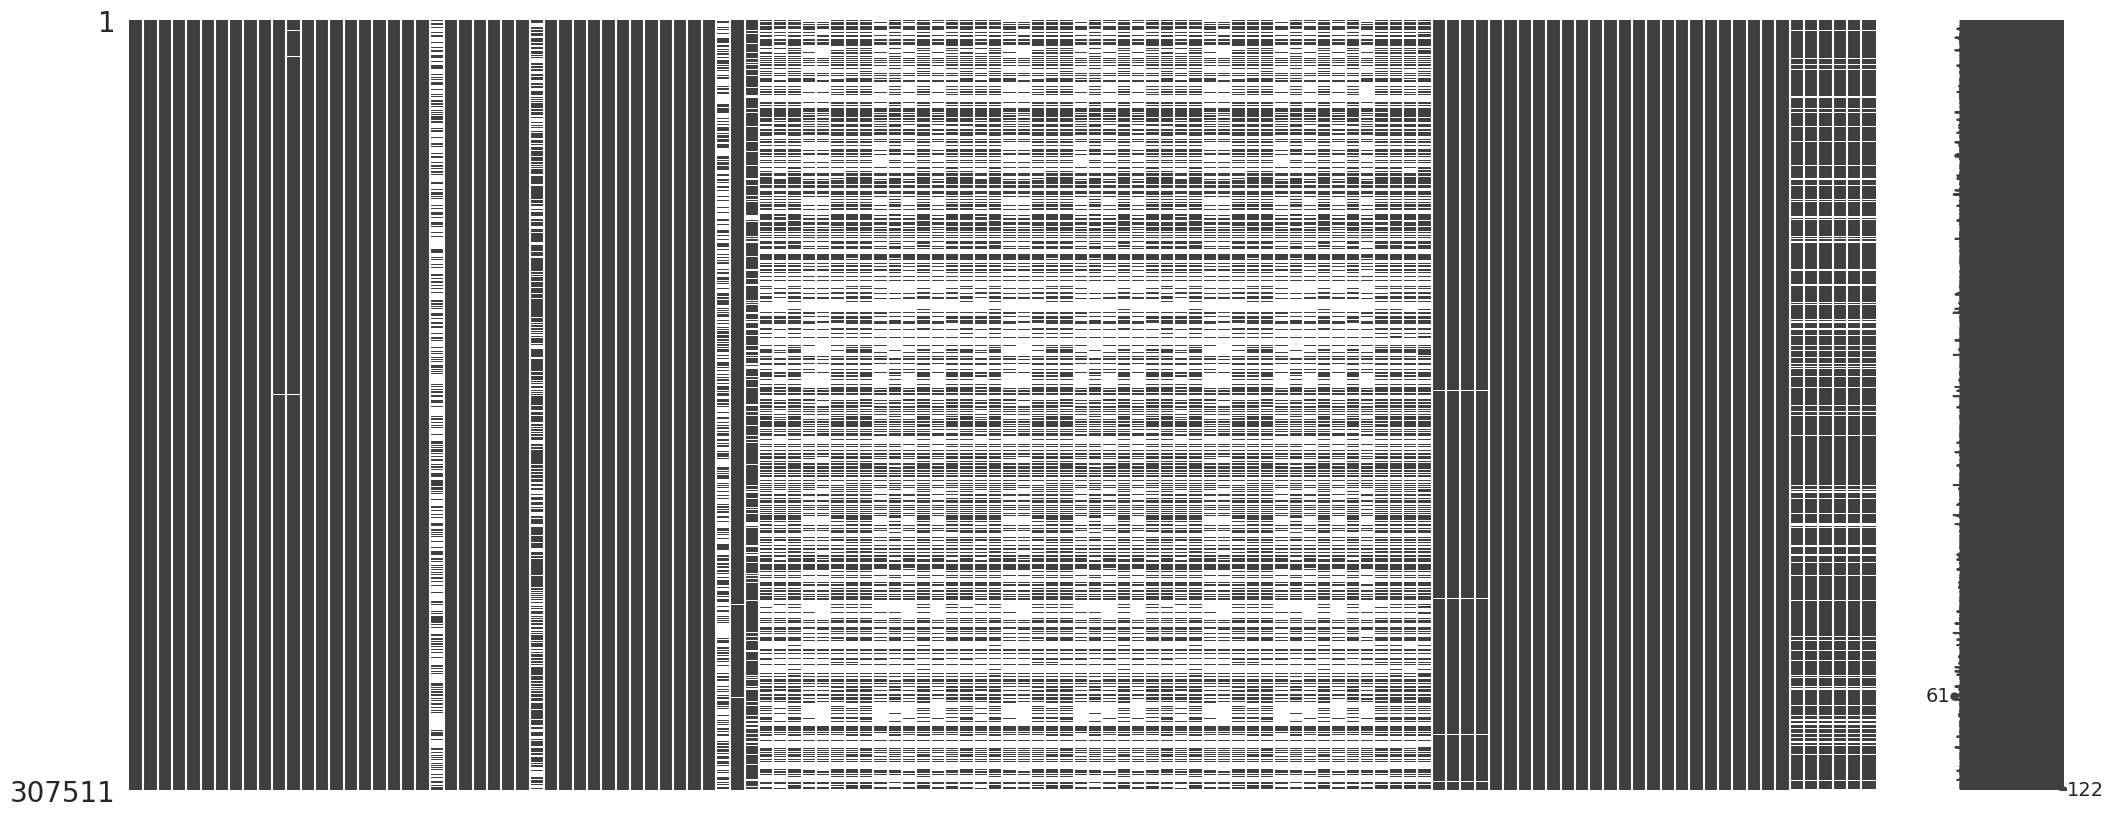

In [6]:
msno.matrix(df_1_application_train)

In [7]:
df_2_application_test

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0             450000.0   Unaccompanied               Working   
1             180000.0   Unaccompanied               Working   
2             630000.0             NaN               Working   
3            1575000.0   Unaccompanied               Working   
4             625500.0   Unaccompanied               Working   
...                ...             ...                   ...   
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                   Higher education            Married  House / apartment   
1      Secondary / secondary special            Married  House / apartment   
2                   Higher education            Married  House / apartment   
3      Secondary / secondary special            Married  House / apartment   
4      Secondary / secondary special            Married  House / apartment   
...                              ...                ...                ...   
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018850      -19241          -2329   
1                        0.035792      -18064          -4469   
2                        0.019101      -20038          -4458   
3                        0.026392      -13976          -1866   
4                        0.010032      -13040          -2191   
...                           ...         ...            ...   
48739                    0.002042      -19970          -5169   
48740                  

<AxesSubplot: >

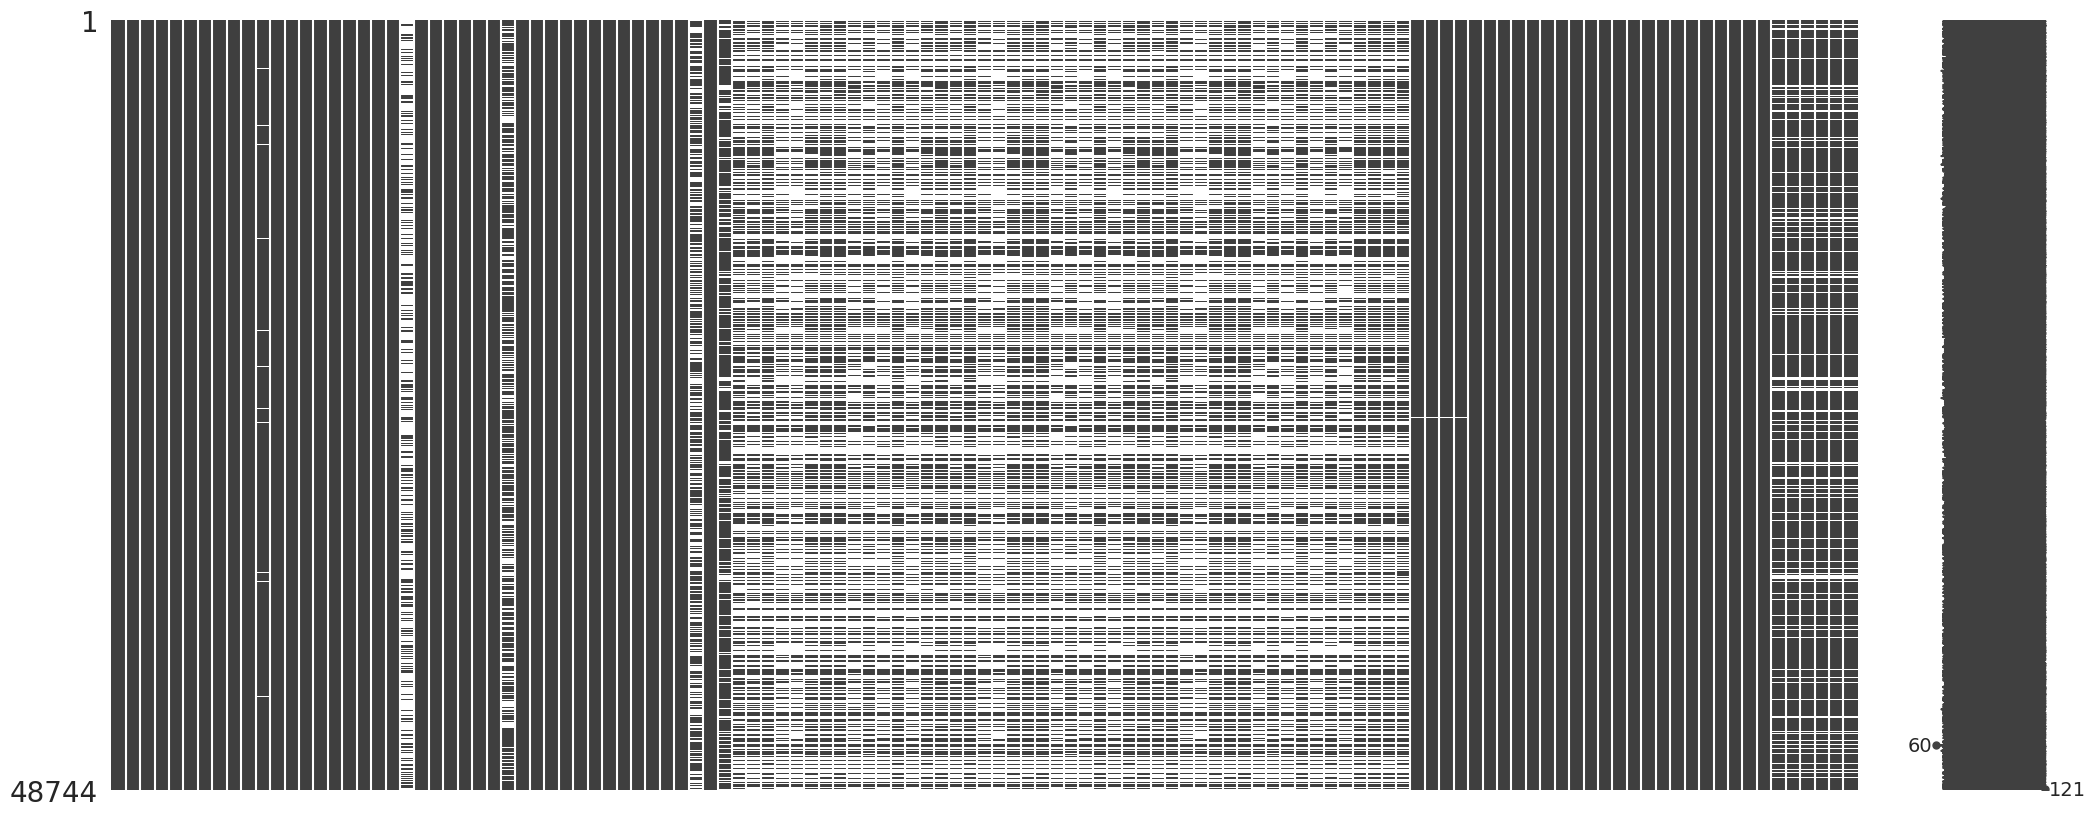

In [8]:
msno.matrix(df_2_application_test)

In [9]:
df_3_bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

<AxesSubplot: >

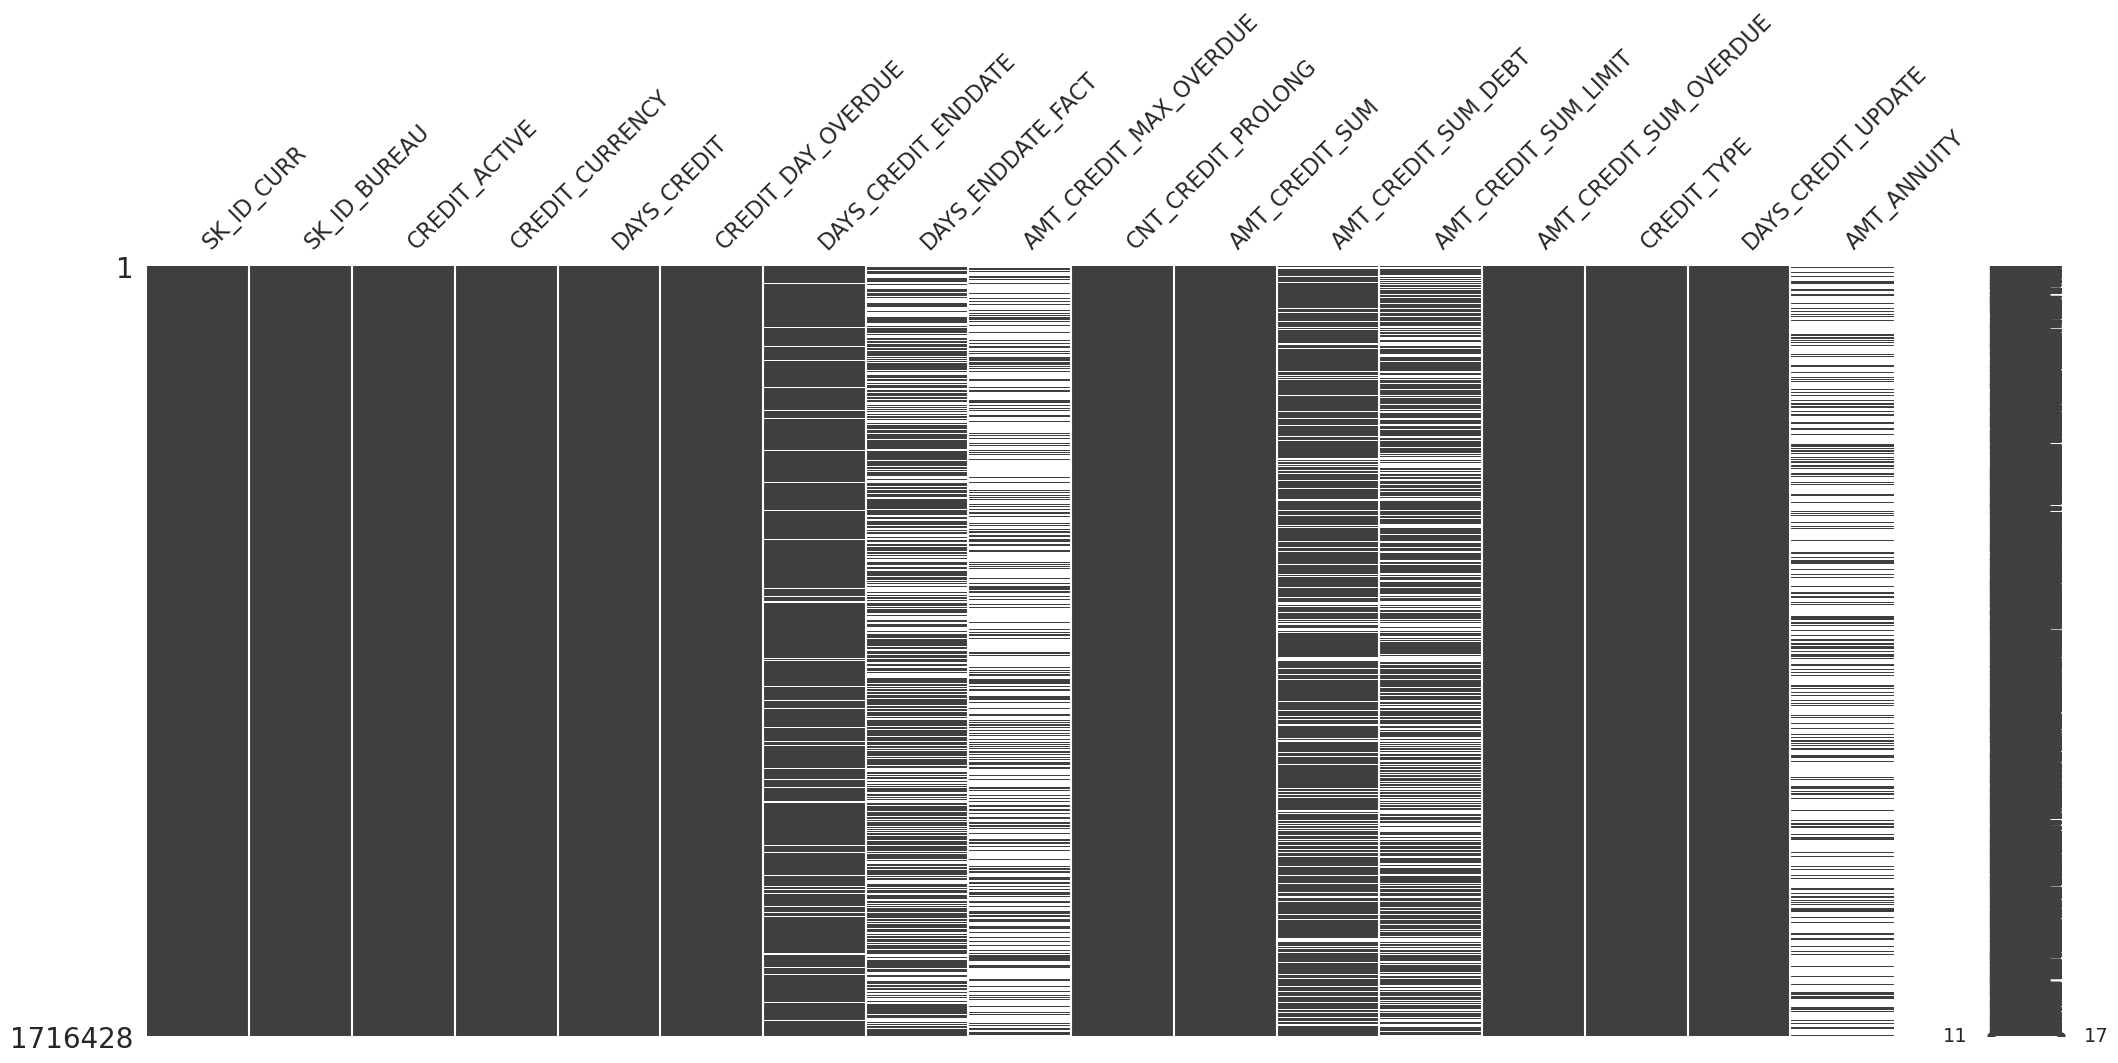

In [10]:
msno.matrix(df_3_bureau)

In [11]:
df_4_bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

<AxesSubplot: >

/usr/lib/python3/dist-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


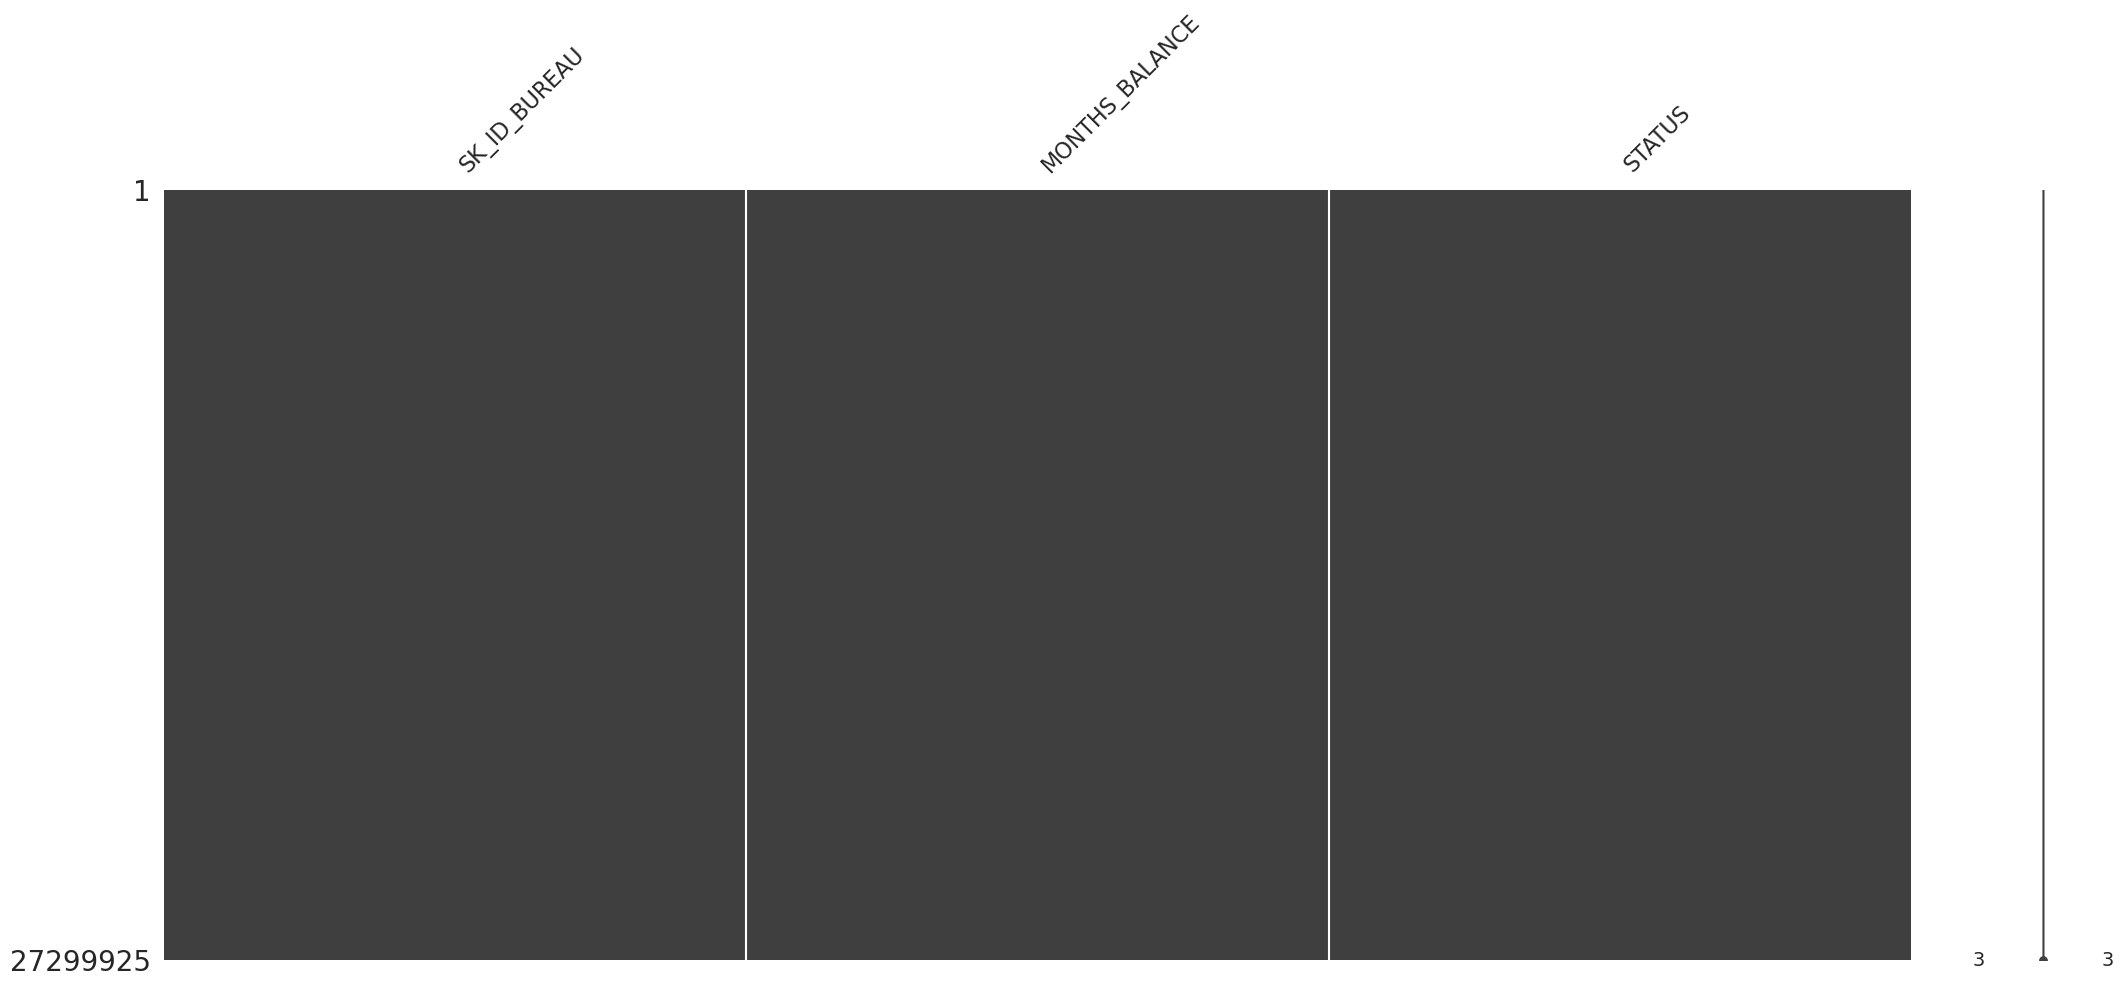

In [12]:
msno.matrix(df_4_bureau_balance)

In [13]:
df_5_credit_card_balance

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000                       0.0   
3                         225000                    2250.0   
4                         450000                       0.0   
...                          ...                       ...   
3840307                    45000                       NaN   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       NaN   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       877.5                         0.0   
1                      2250.0                         0.0   
2                         0.0                         0.0   
3                      2250.0                         0.0   
4                     11547.0                         0.0   
...                       ...                         ...   
3840307                   0.0                         NaN   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         NaN   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
0                           877.5                 1700.325   
1                             0.0                 2250.000   
2                             0.0                 2250.000   
3                             0.0                11795.760   
4                         11547.0                22924.890   
...                           ...                      ...   
3840307                       NaN                    0.000   
3840308                       0.0                    0.000   
3840309                       0.0                 2250.000   
3840310                       NaN                    0.000   
3840311                       0.0                    0.000   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                    1800.00                   1800.000   
1                    2250.00                   2250.000   
2                    2250.00                   2250.000   
3                   11925.00                  11925.000   
4                   27000.00                  27000.000   
...                      ...                        ...   
3840307                  NaN                      0.000   
3840308              1879.11                      0.000   
3840309            375750.00                 356994.675   
3840310                  NaN                      0.000   
3840311                 0.00                      0.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                           0.000          0.000                 0.000   
1                       60175.080      64875.555             64875.555   
2                       26926.425      31460.085             31460.085   
3           

<AxesSubplot: >

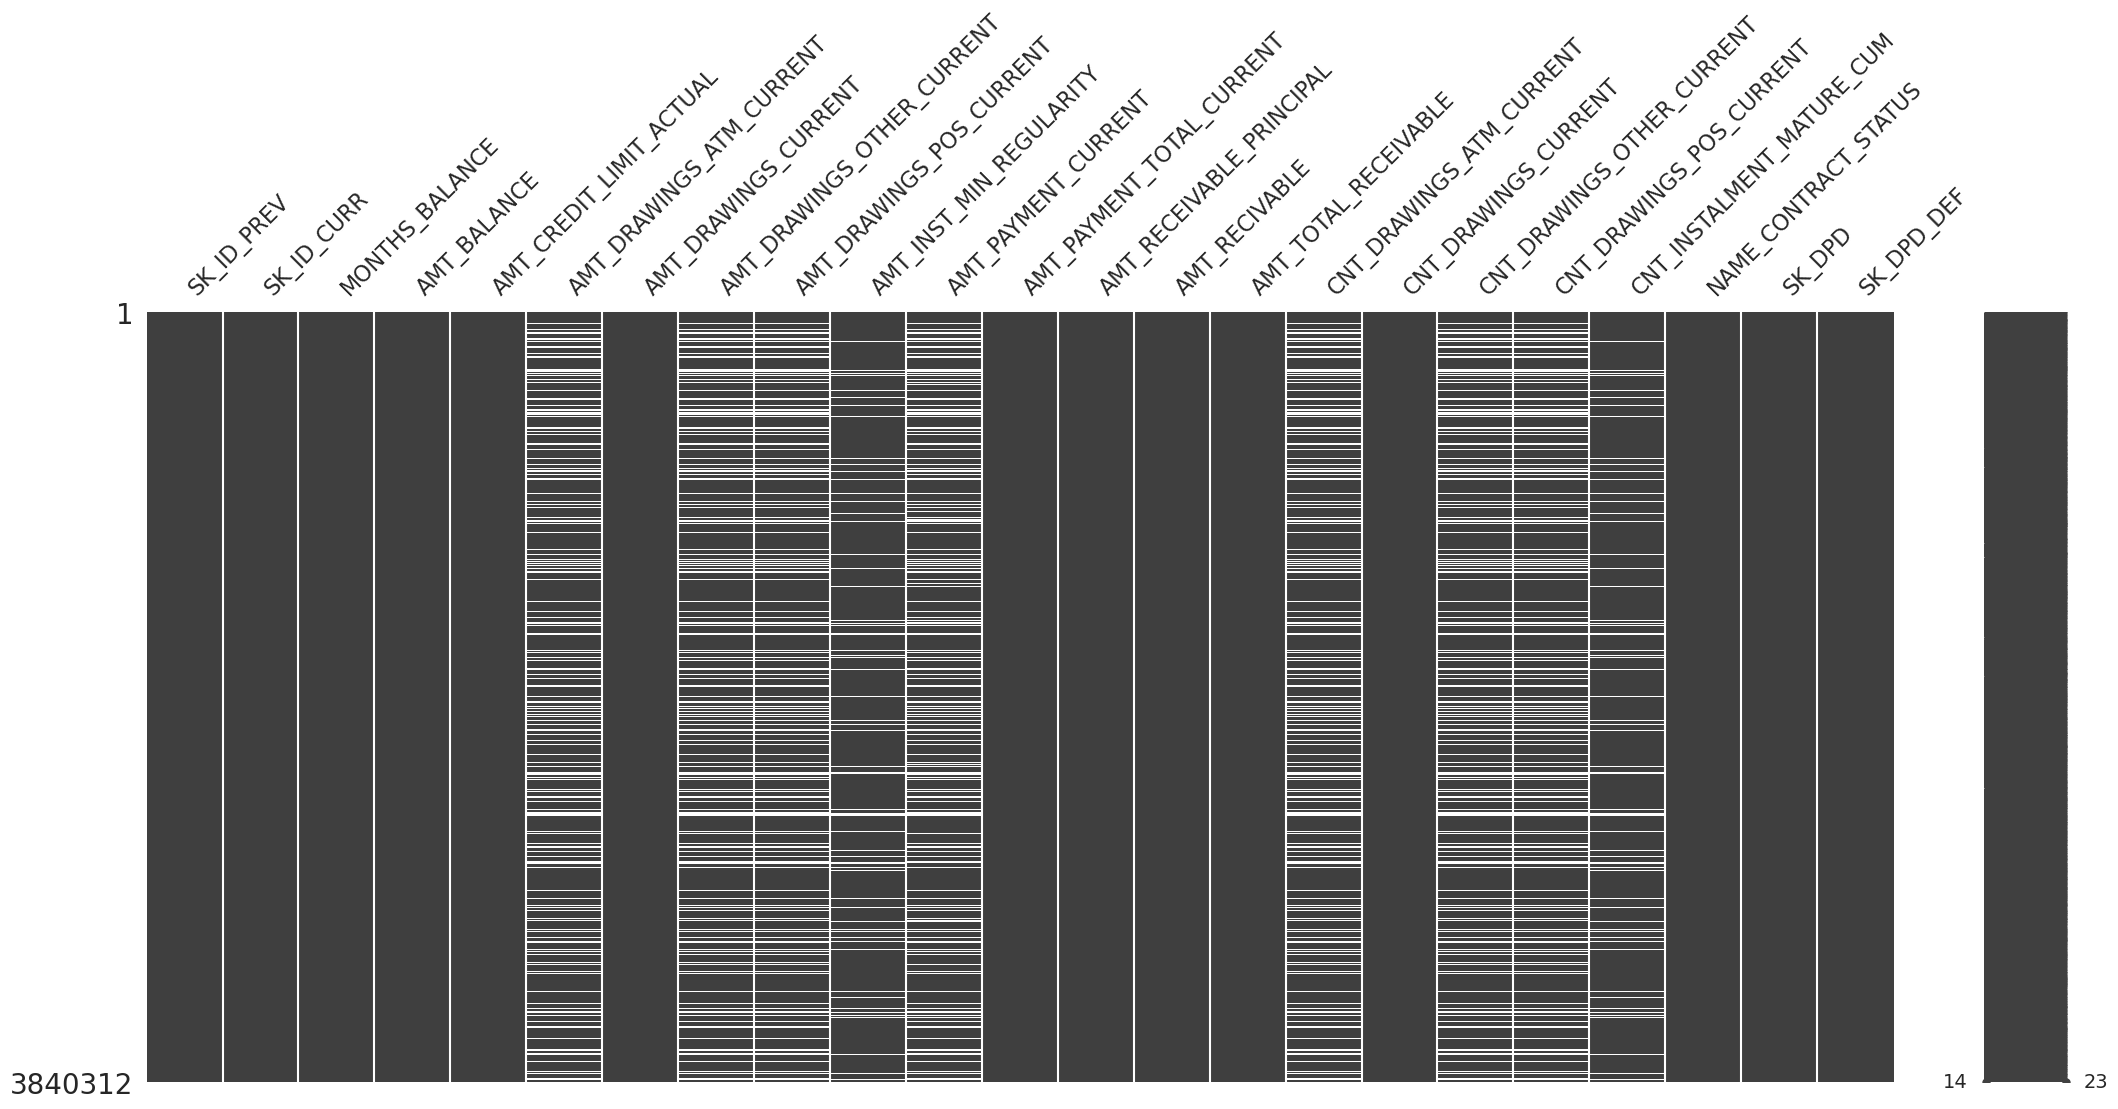

In [14]:
msno.matrix(df_5_credit_card_balance)

In [15]:
df_7_installments_payments

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN  

[13605401 rows x 8 columns]

<AxesSubplot: >

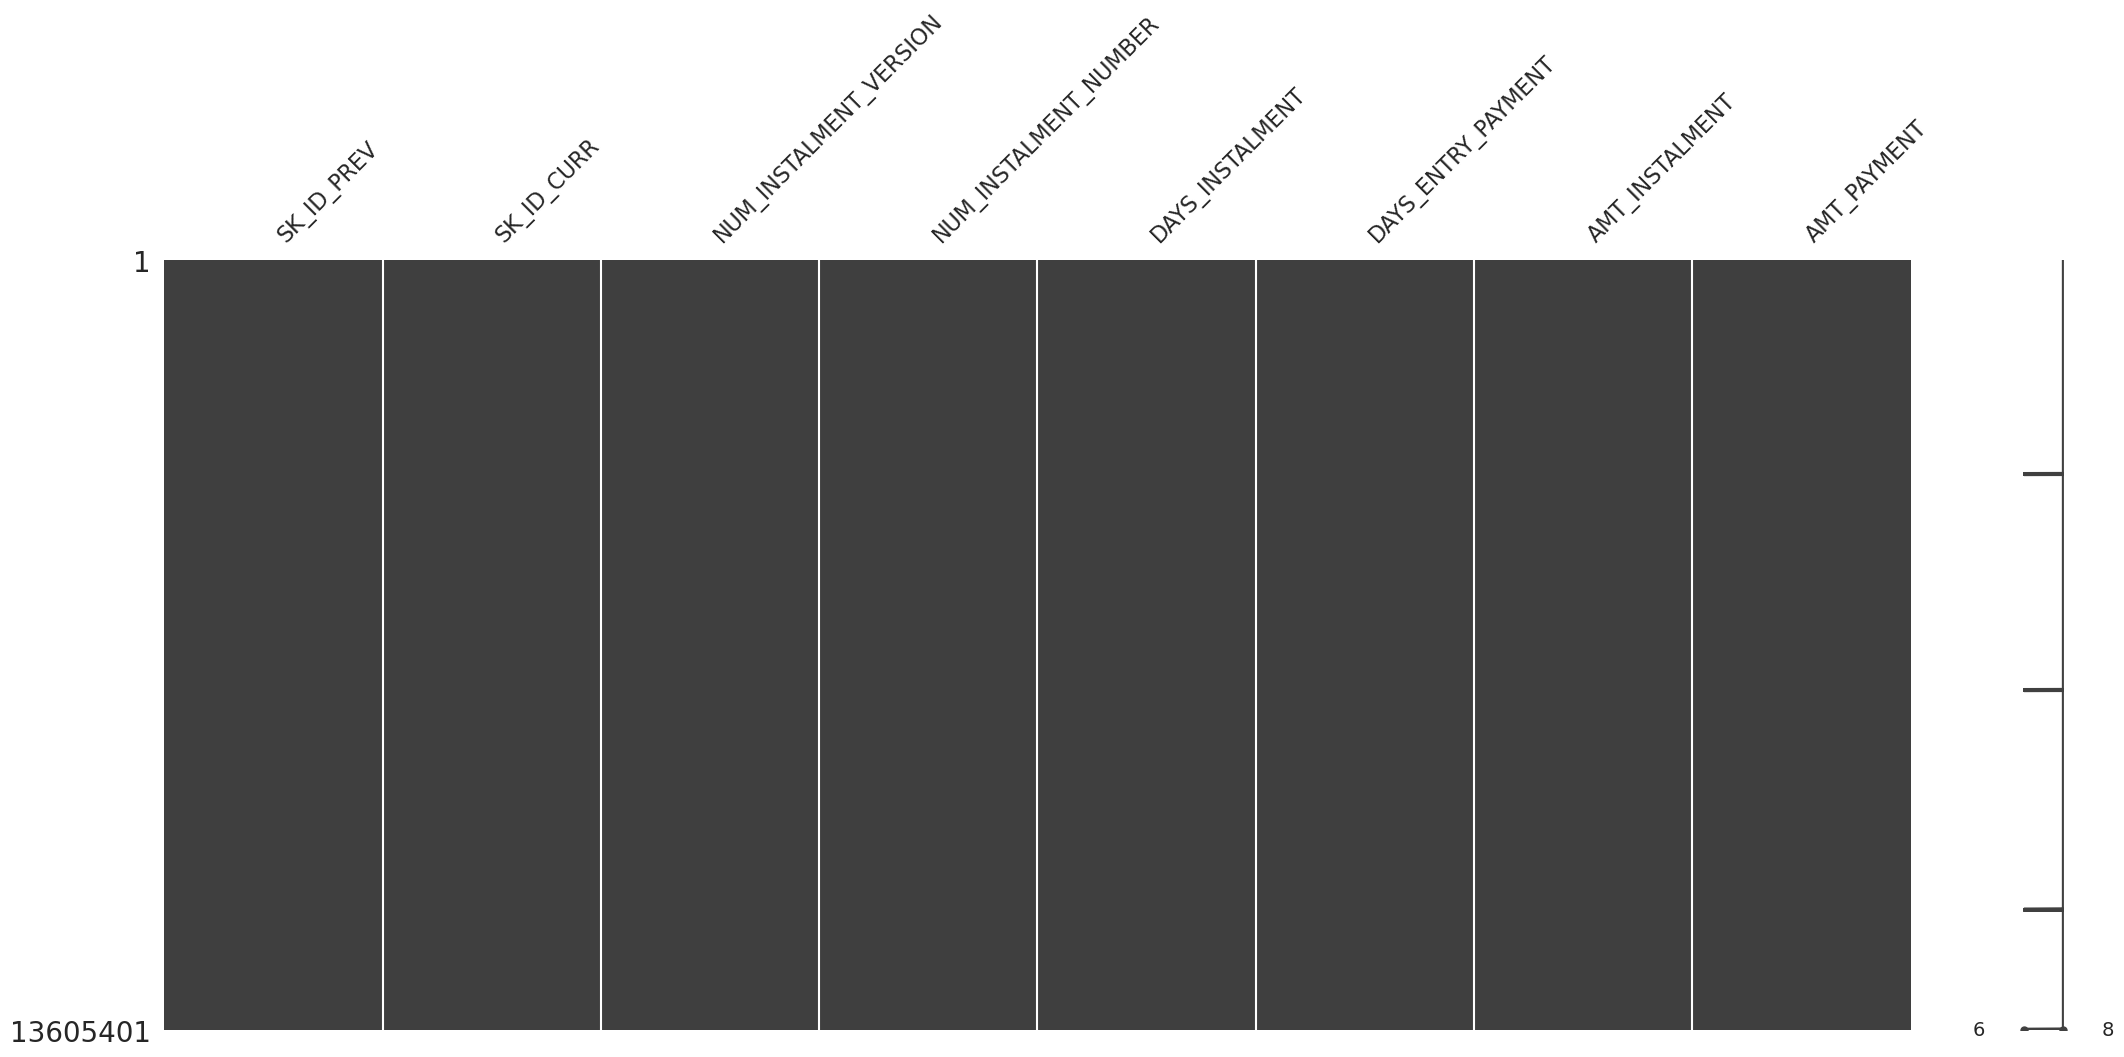

In [16]:
msno.matrix(df_7_installments_payments)

In [17]:
df_8_POS_CASH_balance

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

<AxesSubplot: >

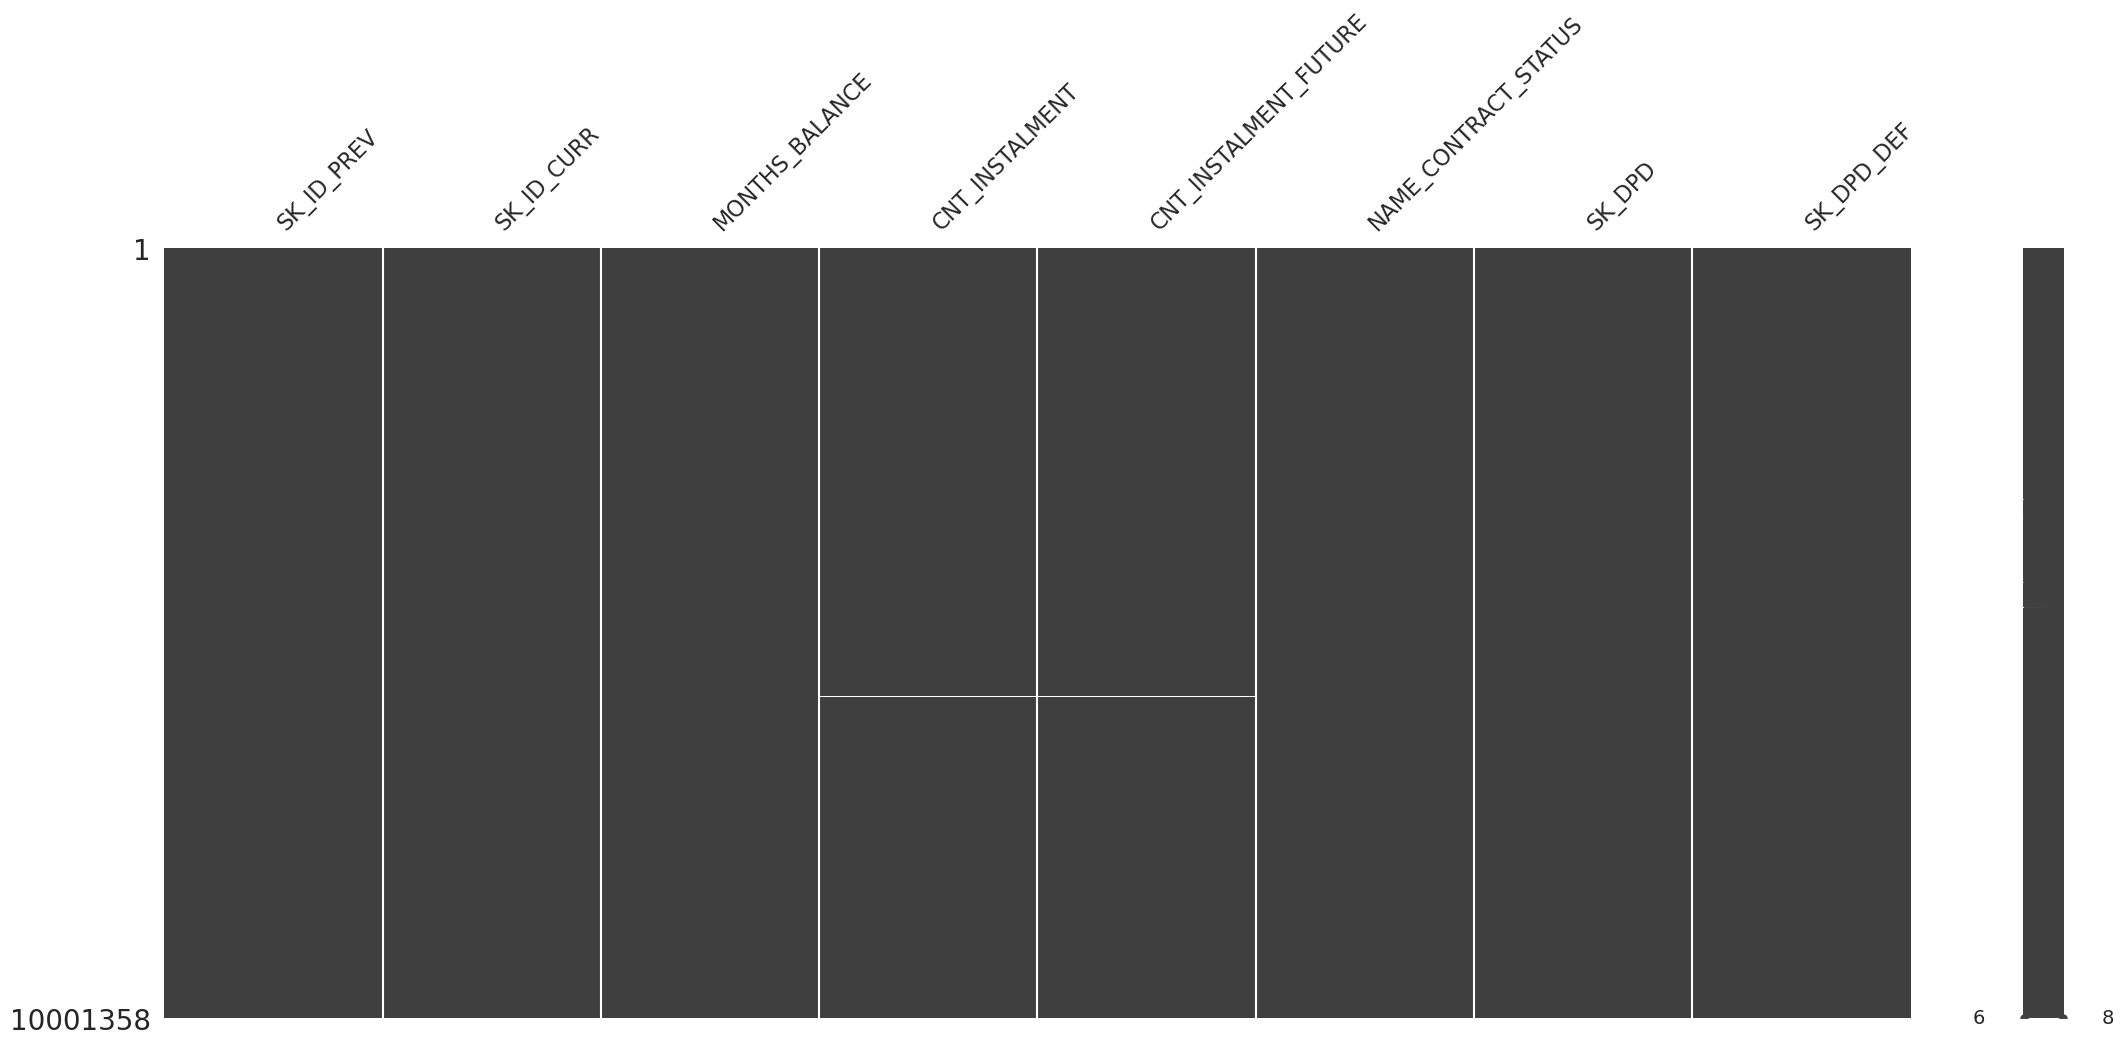

In [18]:
msno.matrix(df_8_POS_CASH_balance)

In [19]:
df_9_previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

<AxesSubplot: >

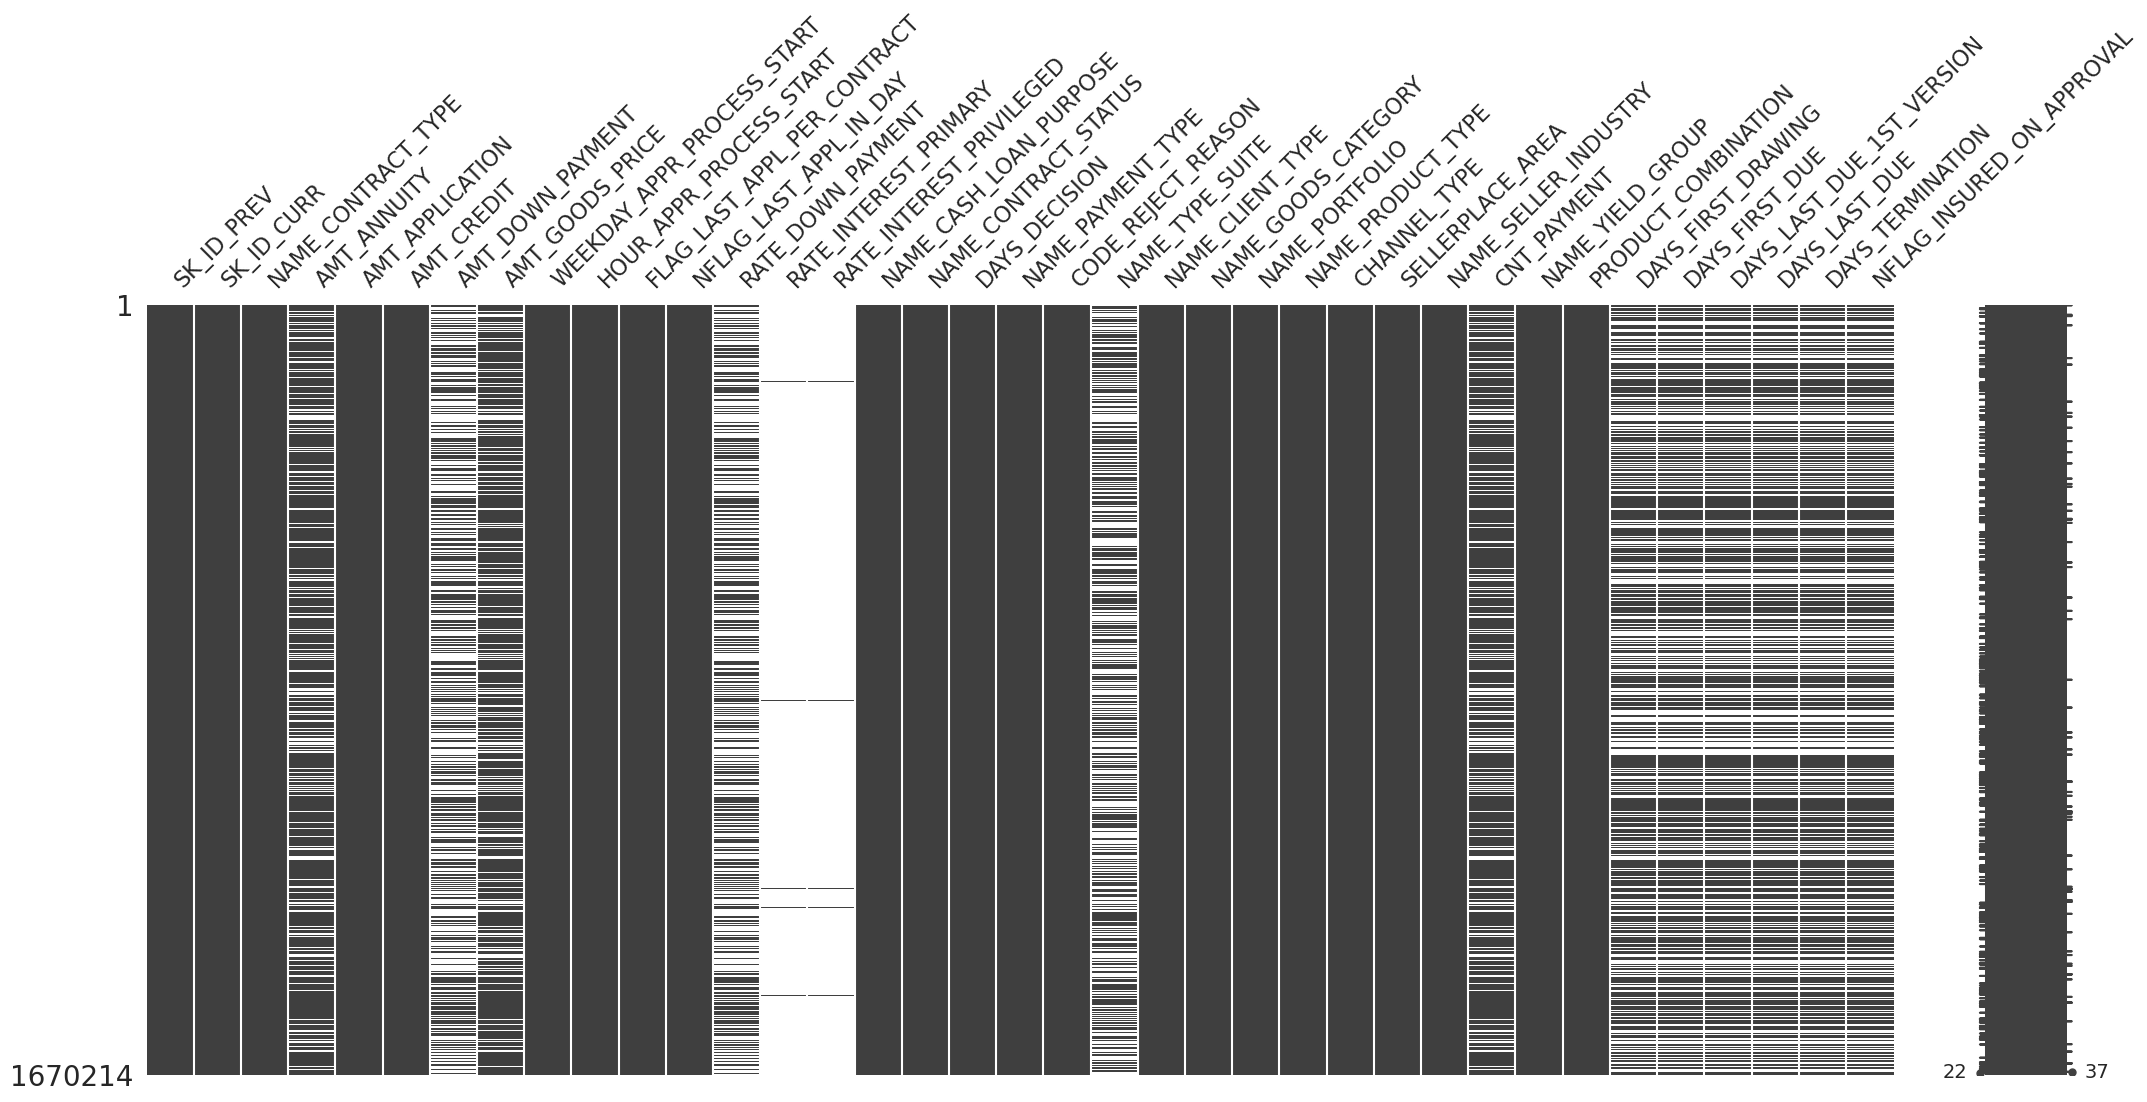

In [20]:
msno.matrix(df_9_previous_application)

In [21]:
df_10_sample_submission

SK_ID_CURR  TARGET
0          100001     0.5
1          100005     0.5
2          100013     0.5
3          100028     0.5
4          100038     0.5
...           ...     ...
48739      456221     0.5
48740      456222     0.5
48741      456223     0.5
48742      456224     0.5
48743      456250     0.5

[48744 rows x 2 columns]

<AxesSubplot: >

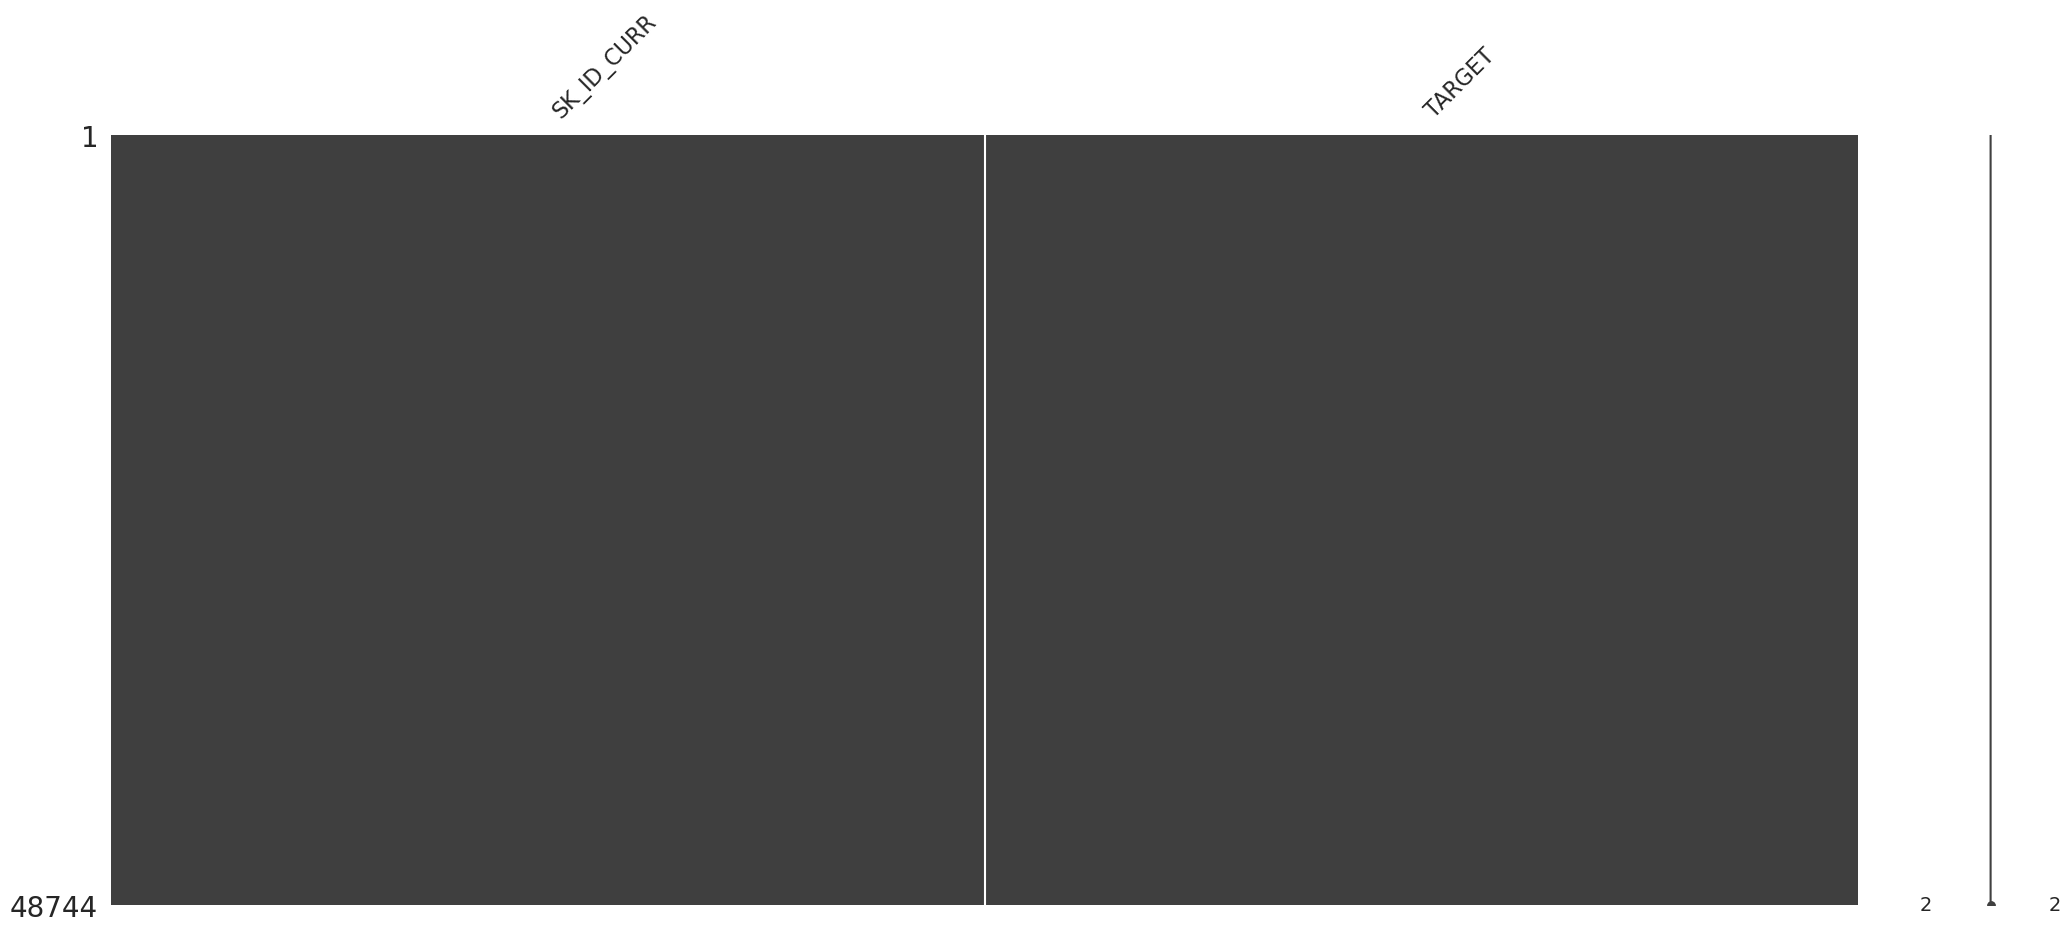

In [22]:
msno.matrix(df_10_sample_submission)

In [23]:
# Collections for each dataset
datasets = [df_1_application_train,df_2_application_test,df_3_bureau,df_4_bureau_balance,df_5_credit_card_balance,df_7_installments_payments,df_8_POS_CASH_balance,df_9_previous_application,df_10_sample_submission
           ]
names = [

'df_1_application_train',
'df_2_application_test',
'df_3_bureau',
'df_4_bureau_balance',
'df_5_credit_card_balance',
'df_7_installments_payments',
'df_8_POS_CASH_balance',
'df_9_previous_application',
'df_10_sample_submission' ]

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

# SCHEMA

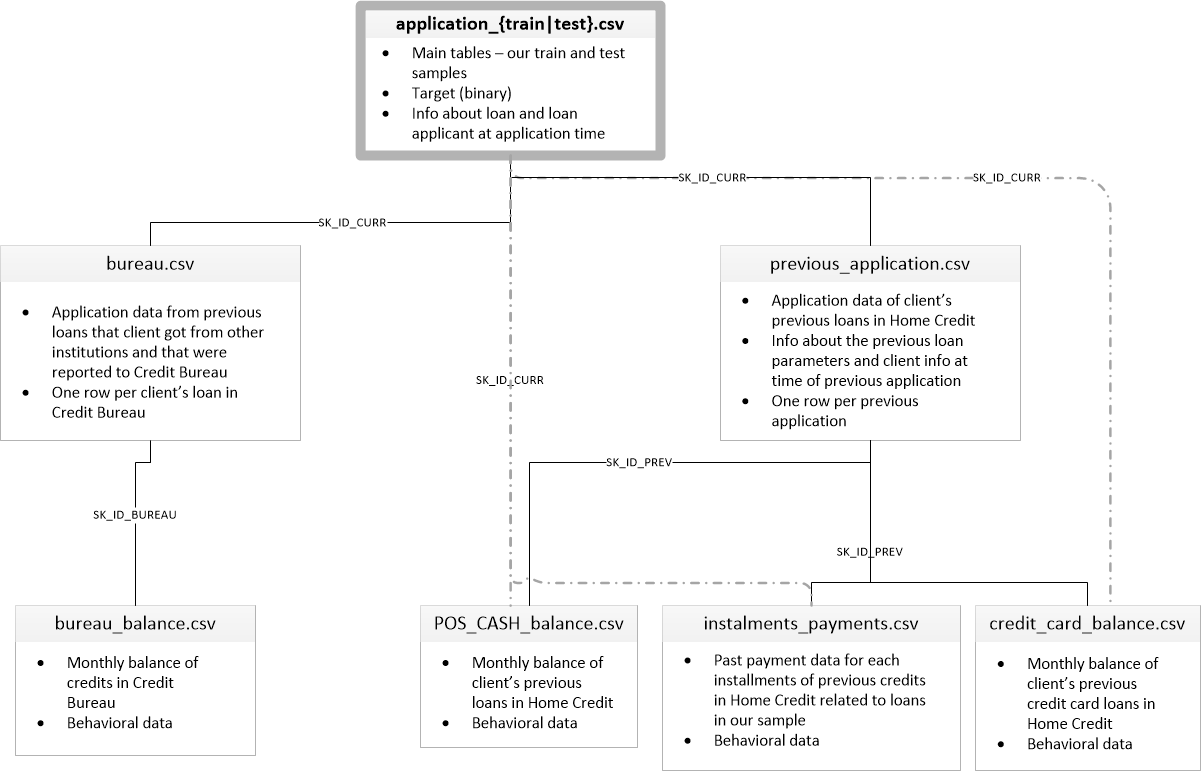

# Analyse exploratoire


In [24]:
data = df_1_application_train

In [25]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# Inspect for duplicates

In [26]:
data.duplicated().sum()

0

# Inspect for NAN

In [27]:
data.duplicated().sum()

0

# Look for any unreal value and transform it (IF needed)
Regarding to the categorical variables, I'll Investigate for any unreal data like -unkown- or -missing- or any value give me the intuiton that this value should be NAN

In [28]:
for i in data:
    if data[i].dtype == 'O': # Filter only the categorical variables 
        print(f"{i} contain:", data[i].unique())
        print("------------------")

NAME_CONTRACT_TYPE contain: ['Cash loans' 'Revolving loans']
------------------
CODE_GENDER contain: ['M' 'F' 'XNA']
------------------
FLAG_OWN_CAR contain: ['N' 'Y']
------------------
FLAG_OWN_REALTY contain: ['Y' 'N']
------------------
NAME_TYPE_SUITE contain: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
------------------
NAME_INCOME_TYPE contain: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
------------------
NAME_EDUCATION_TYPE contain: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
------------------
NAME_FAMILY_STATUS contain: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
------------------
NAME_HOUSING_TYPE contain: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
------------------
OC

# Findings
I can see in CODE_GENDER and ORGANIZATION_TYPE Columns have 'XNA' Value and due to the reply of one of the compition hosts at this link https://www.kaggle.com/c/home-credit-default-risk/discussion/57248 we will consider the 'XNA' and 'XNP' are NaN values (Check the first reply by 'Martin Kotek')

Also in column NAME_FAMILY_STATUS there's 'Uknown' value which I'll consider also as a NAN

In [29]:
print(data[['ORGANIZATION_TYPE','NAME_FAMILY_STATUS', 'CODE_GENDER']].isnull().sum())
print('-'*40)
print(data[['ORGANIZATION_TYPE','NAME_FAMILY_STATUS', 'CODE_GENDER']].isnull().sum())

ORGANIZATION_TYPE     0
NAME_FAMILY_STATUS    0
CODE_GENDER           0
dtype: int64
----------------------------------------
ORGANIZATION_TYPE     0
NAME_FAMILY_STATUS    0
CODE_GENDER           0
dtype: int64


In [30]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [31]:
data.replace({'XNA': np.nan, 'XNP': np.nan, 'Unknown': np.nan}, inplace = True)

In [32]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

# Dropping the columns which contain more than 40% NaNs
Note:
If we have a time we may investigate further to gather more clean data or check with concerned team like (Data Engineers) why we have such all of this NaNs in those columns,
but for now I'll just drop them as we don't have that much time

In [33]:
data.drop(data.columns[data.isnull().mean()>0.4],axis=1, inplace=True)

In [34]:
data.shape

(307511, 73)

In [35]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
ORGANIZATION_TYPE             18.007161
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CODE_GENDER                    0.001301
CNT_FAM_MEMBERS                0.000650
NAME_FAMILY_STATUS             0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

# Transformations
For speeding the approach, Columns which contain a very small amount of NaNs valuse will convert it to the most frequent (Mode) in case of categorical variables and Mean in case of numerical variables
I'll do it for all columns which contain NaN values under 14%

In [36]:
# Columns have less 14% NaN Values and categorical
Cat_columns_lower_percentage_nan  = [i for i in data.columns[(((data.isnull().sum() / data.shape[0]) * 100) > 0) 
                                                                  & (((data.isnull().sum() / data.shape[0]) * 100) < 14)] 
                                     if data[i].dtype == 'O']

# Columns have less 14% NaN Values and numerical
num_columns_lower_percentage_nan  = [i for i in data.columns[(((data.isnull().sum() / data.shape[0]) * 100) > 0) 
                                                                  & (((data.isnull().sum() / data.shape[0]) * 100) < 14)] 
                                     if data[i].dtype != 'O']

In [37]:
# Note: only on the app_train data because I want to avoide any data leakage so I will first transform the test data (based on information from train data (Mode,Mean))
# Then  transform the train data

for i in Cat_columns_lower_percentage_nan:
    data[i].fillna(data[i].mode()[0], inplace=True)
  

# Inspect Outliers
I will check the numerical varibales we are about to fill the NaN values before the filling (Investigate for any outliers to see weather we will use mode or median or something else)

In [38]:
data[num_columns_lower_percentage_nan].describe()

AMT_ANNUITY  AMT_GOODS_PRICE  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
count  307499.000000     3.072330e+05    307509.000000  3.068510e+05   
mean    27108.573909     5.383962e+05         2.152665  5.143927e-01   
std     14493.737315     3.694465e+05         0.910682  1.910602e-01   
min      1615.500000     4.050000e+04         1.000000  8.173617e-08   
25%     16524.000000     2.385000e+05         2.000000  3.924574e-01   
50%     24903.000000     4.500000e+05         2.000000  5.659614e-01   
75%     34596.000000     6.795000e+05         3.000000  6.636171e-01   
max    258025.500000     4.050000e+06        20.000000  8.549997e-01   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000               265992.000000   
mean              -962.858788                    0.006402   
std                826.808487                    0.083849   
min              -4292.000000                    0.000000   
25%              -1570.000000                    0.000000   
50%               -757.000000                    0.000000   
75%               -274.000000                    0.000000   
max                  0.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               265992.000000  
mean                     1.899974  
std                      1.869295  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

/tmp/ipykernel_460938/422550986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
/tmp/ipykernel_460938/422550986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
/tmp/ipykernel_460938/422550986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed i

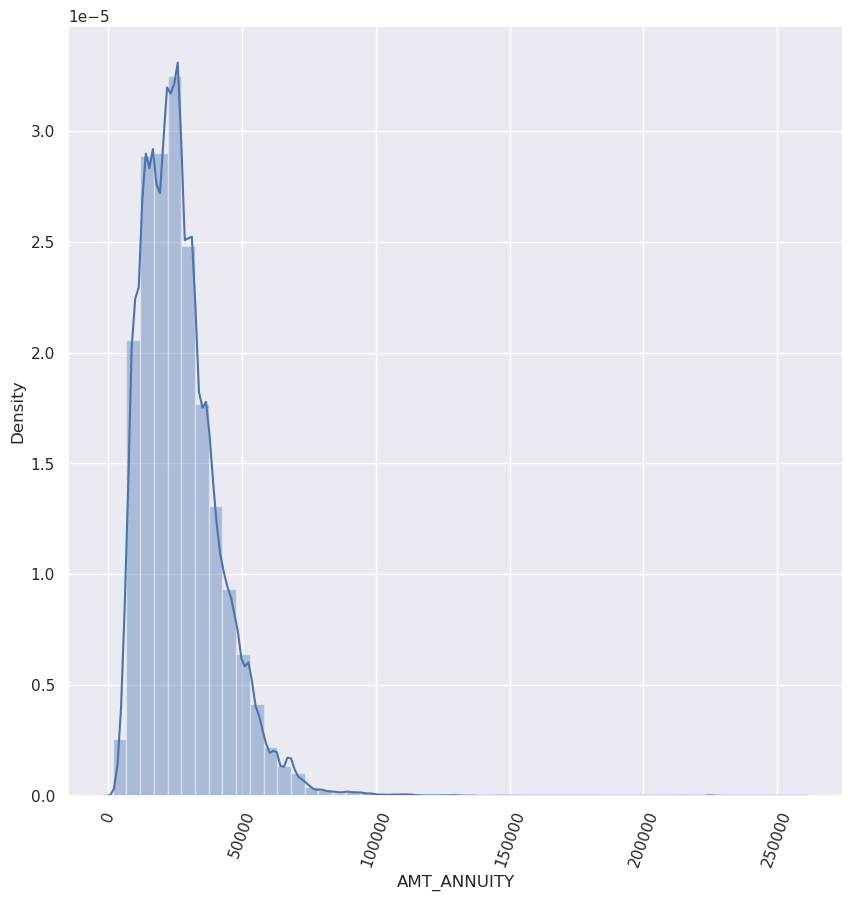

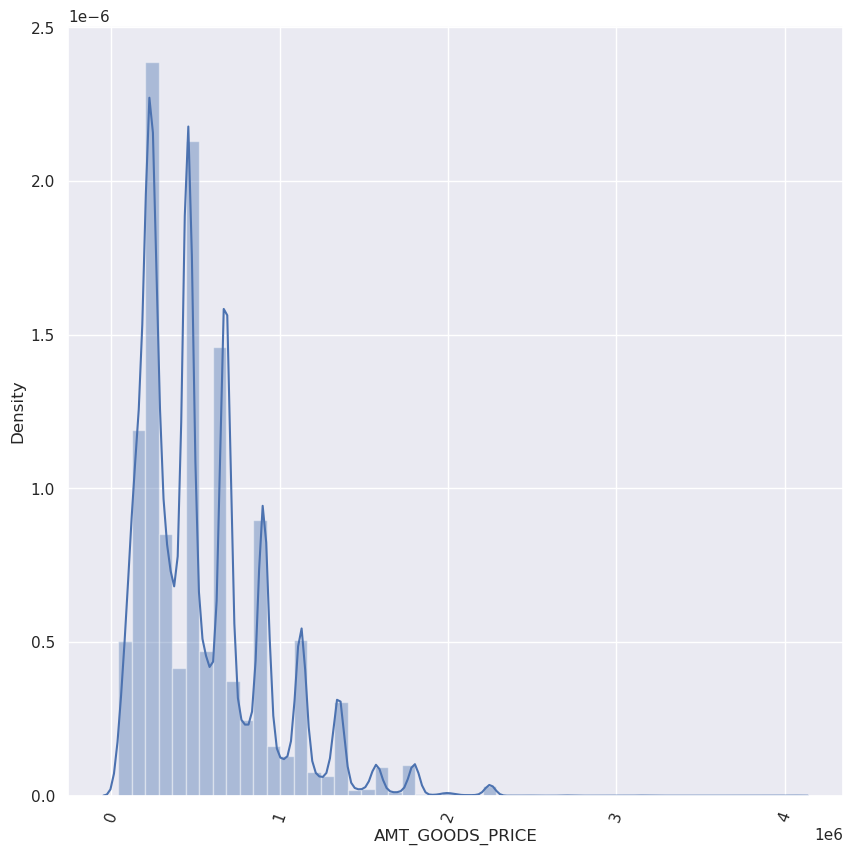

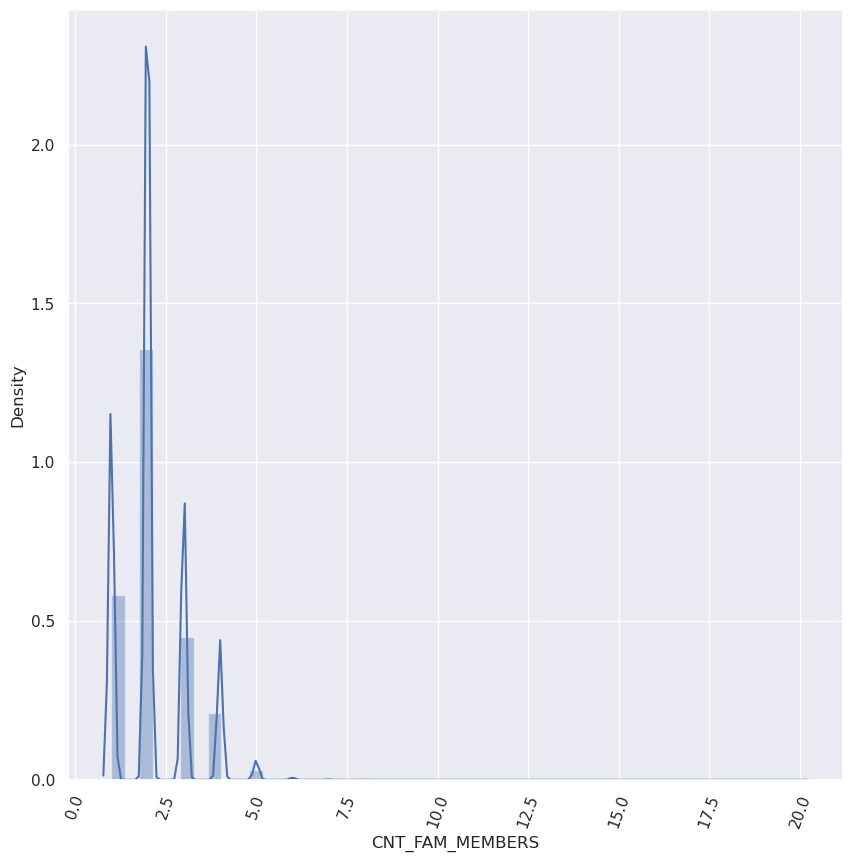

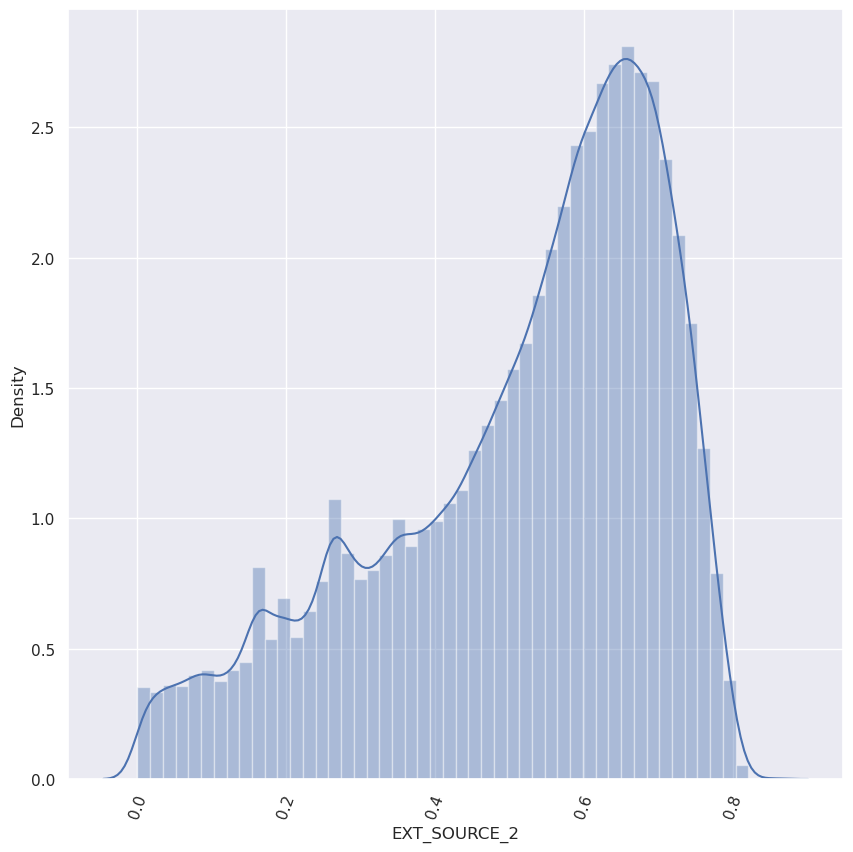

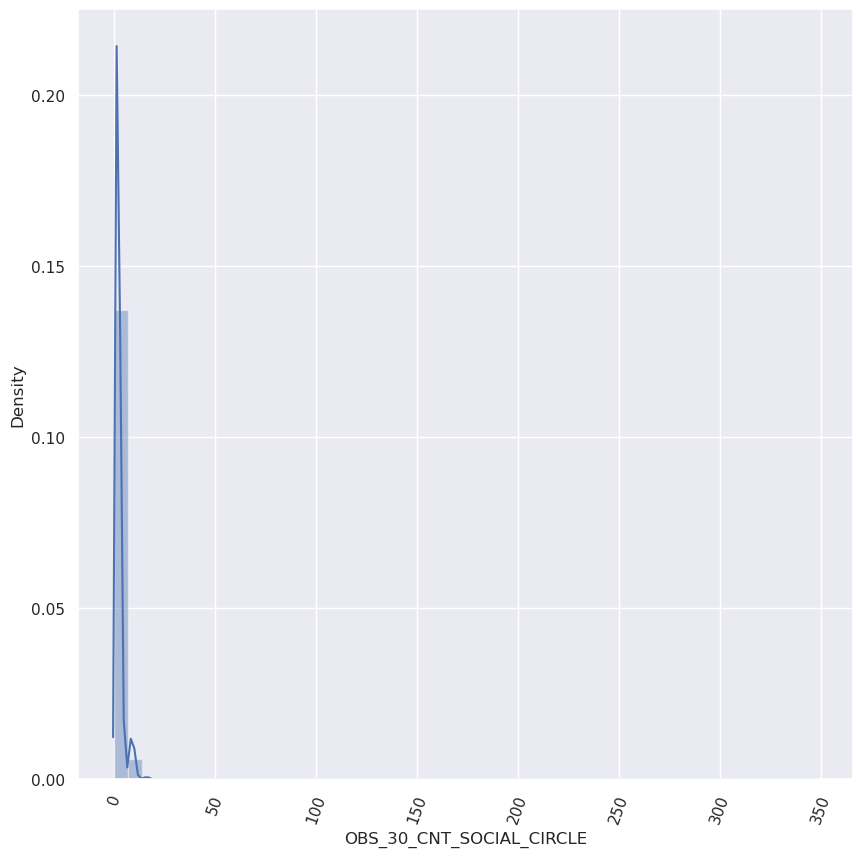

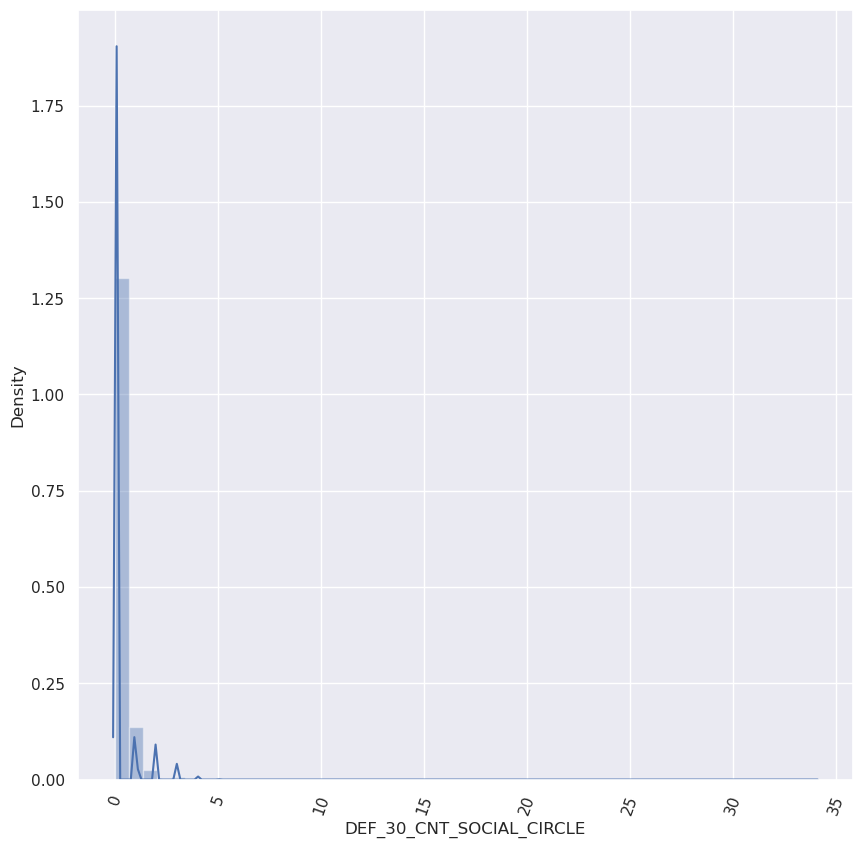

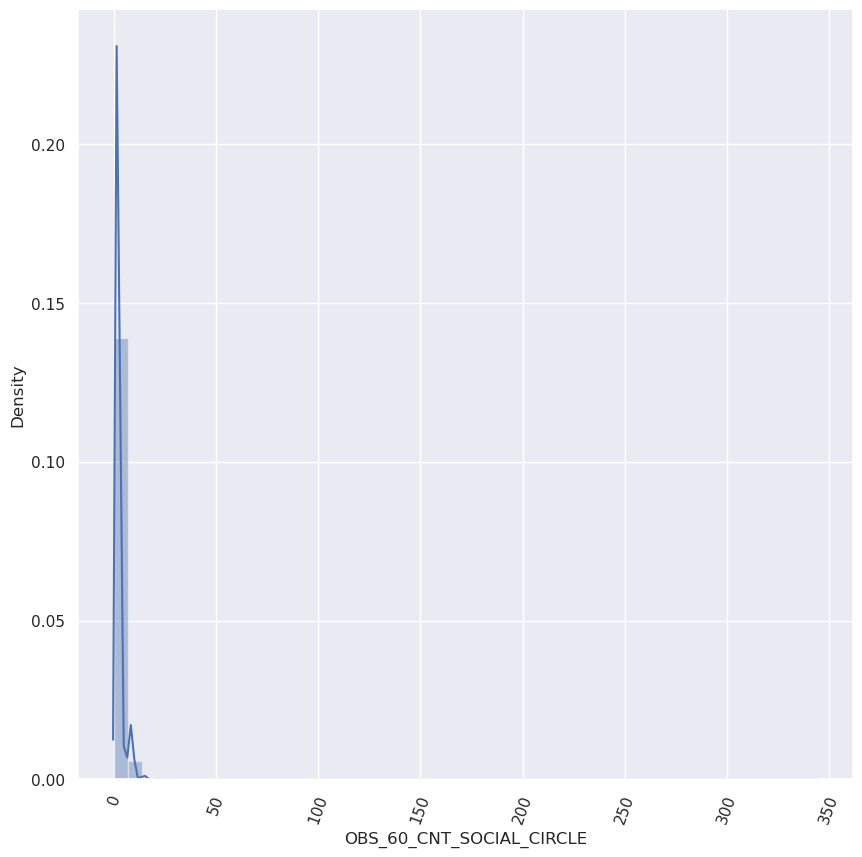

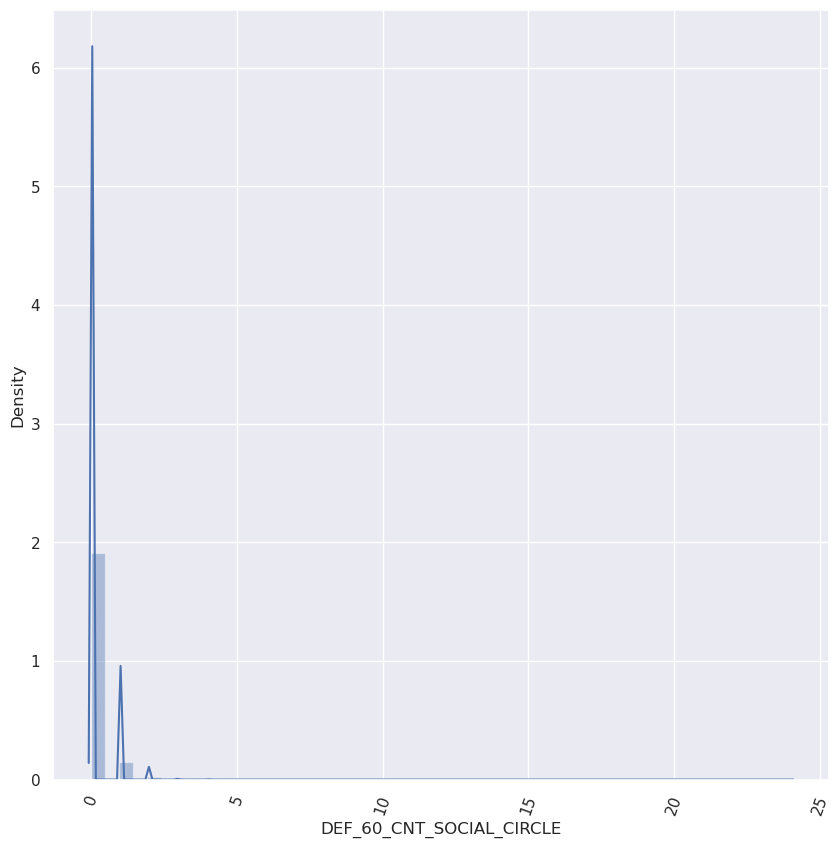

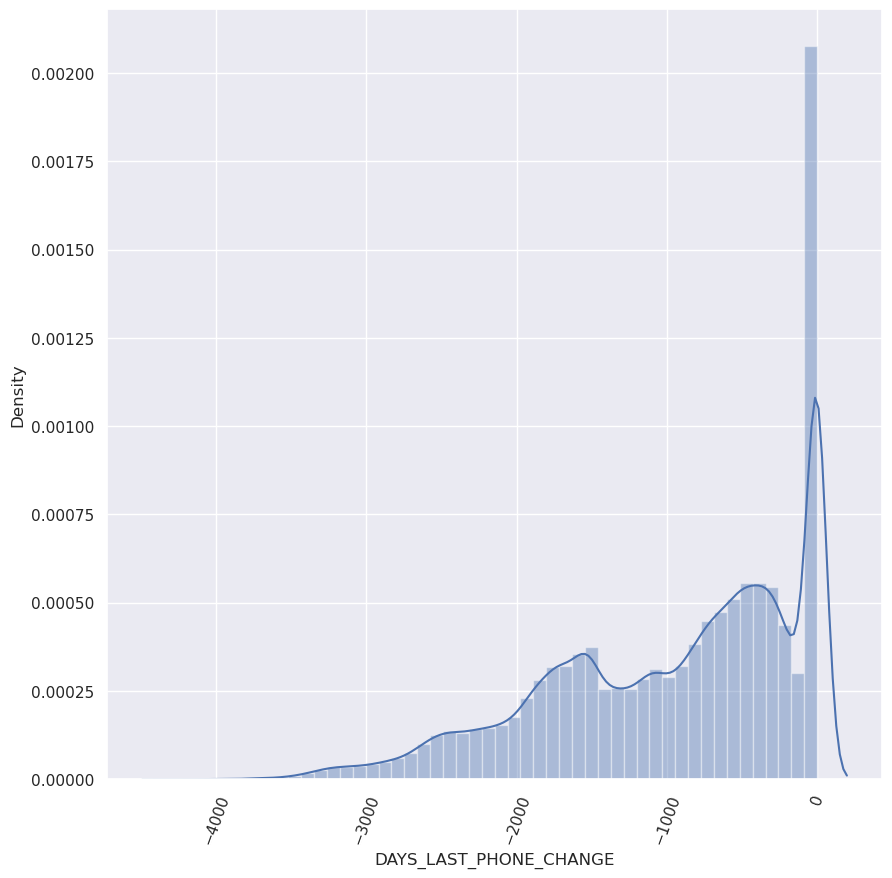

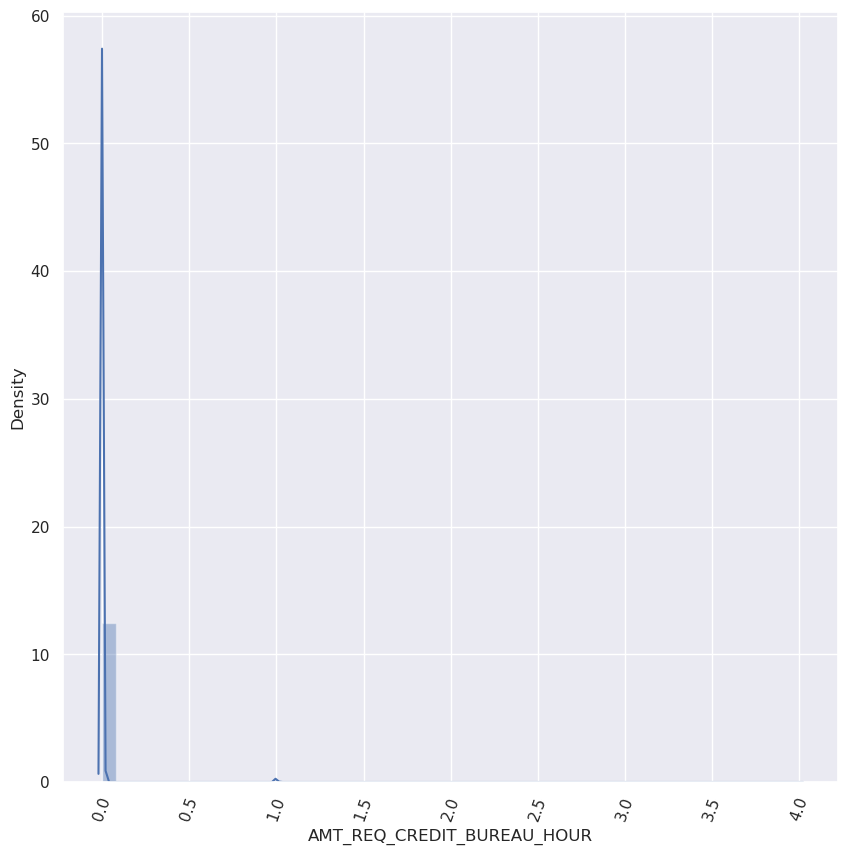

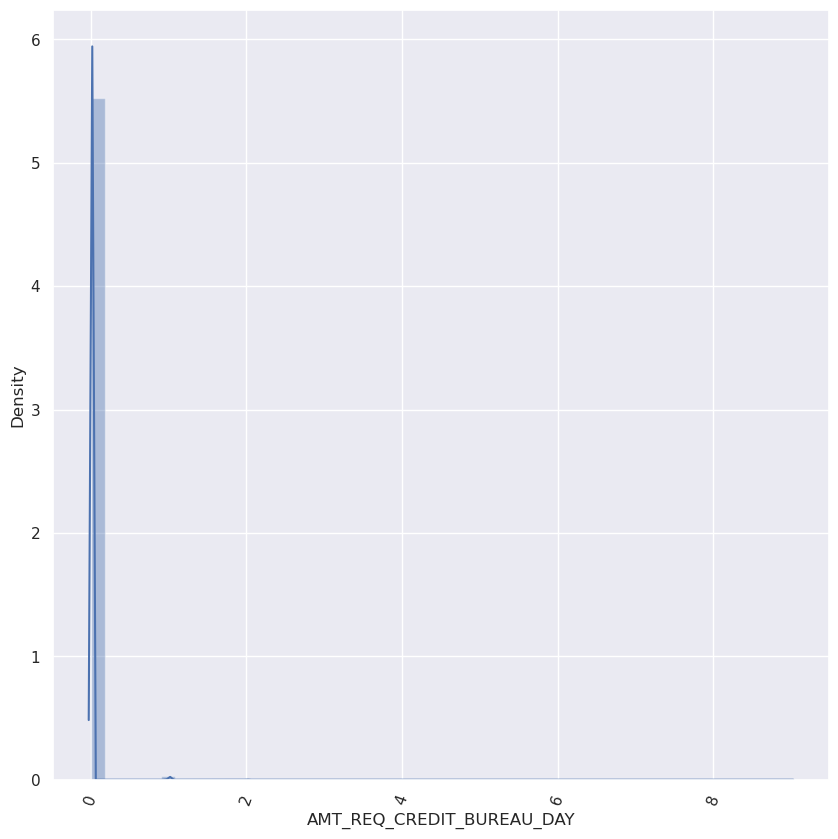

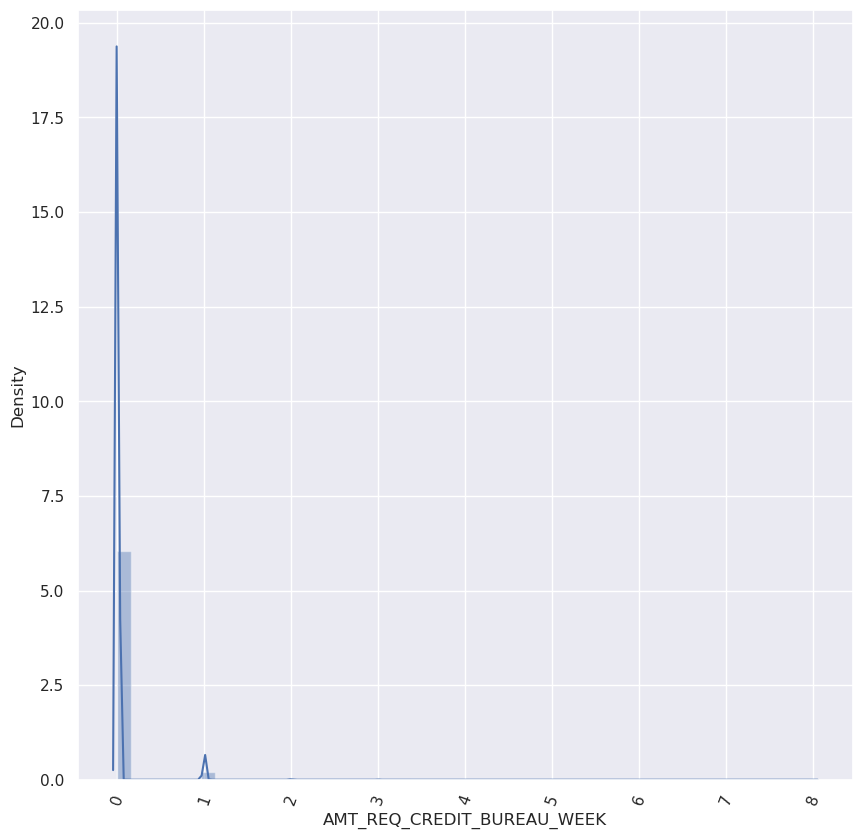

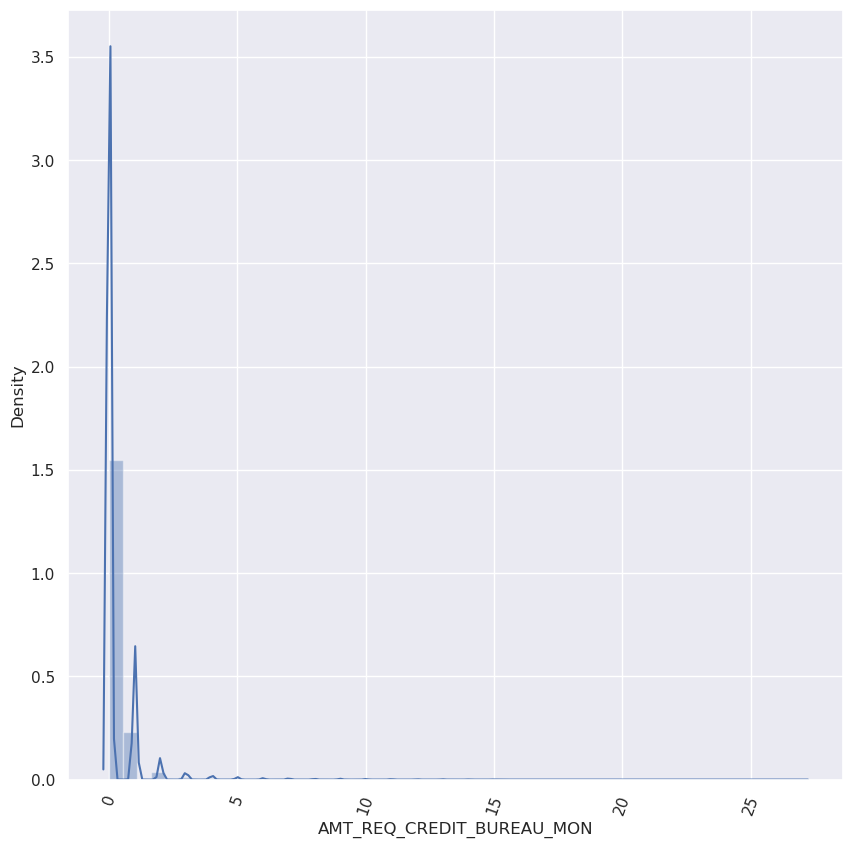

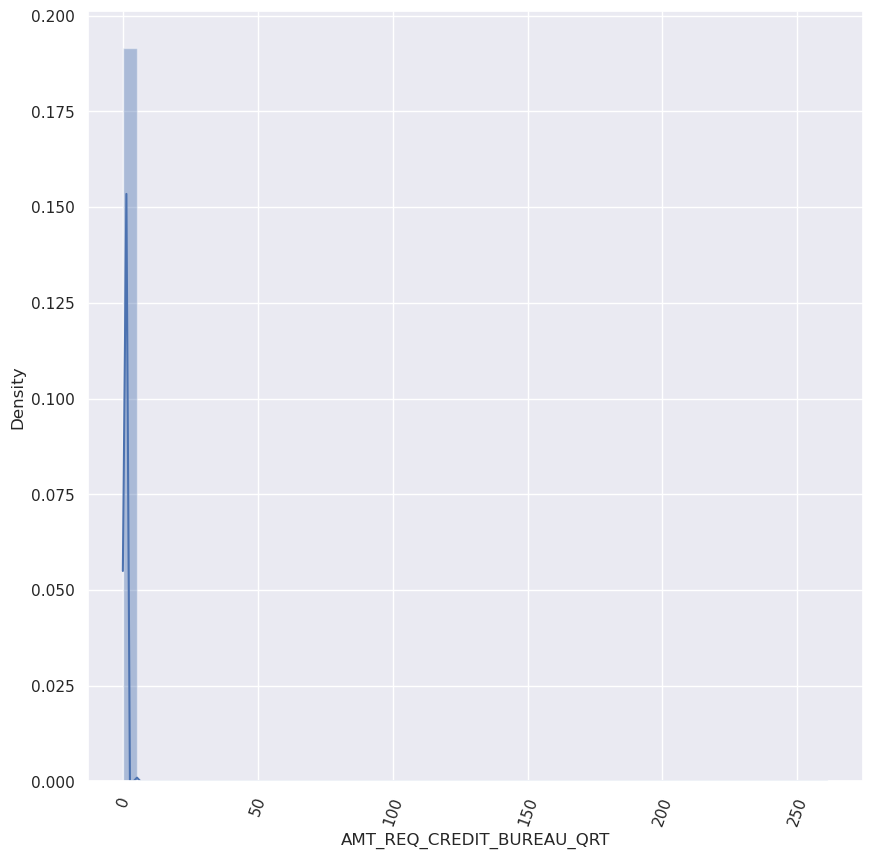

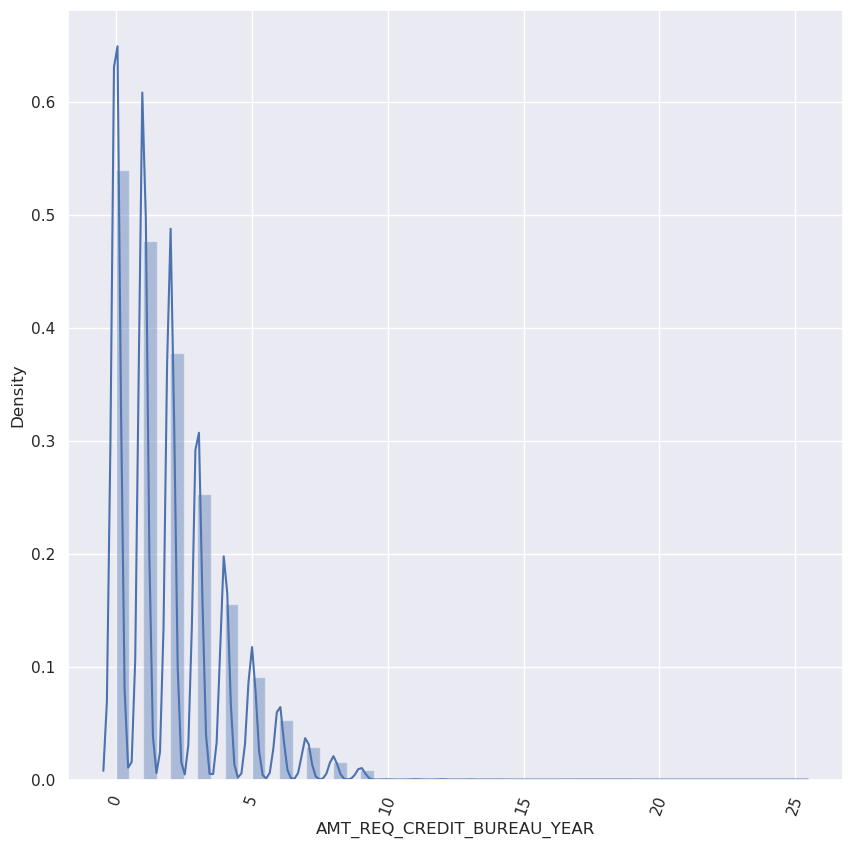

In [39]:
for i in num_columns_lower_percentage_nan:
    plt.figure(figsize=(10,10))
    sns.distplot(data[i])
    plt.xticks(rotation = 70)

# Mean imputation 


I can see some of the features are very skewed to the right (Outliers Exists) and some aren't. So I'll impute using mode for all variables

except EXT_SOURCE_2, AMT_ANNUITY I'll use the mean as I can see from their distrbutions that the mean will be reliable value

In [40]:
col_mod_transfrom = [i for i in num_columns_lower_percentage_nan if i not in ['EXT_SOURCE_2', 'AMT_ANNUITY','AMT_GOODS_PRICE']]
col_mean_transform = ['EXT_SOURCE_2', 'AMT_ANNUITY']

In [41]:
for i in col_mod_transfrom:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [42]:
for i in col_mean_transform:
    data[i].fillna(data[i].mean(), inplace=True)

In [43]:
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median(),inplace = True)


In [44]:
# extract continuous columns
all_numerical_cols = list(data.select_dtypes(exclude='object').columns)


In [45]:
all_numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [46]:
# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col != "TARGET" and col[:5]!='FLAG_']

/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be re

/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_460938/1175125882.py:5: UserWarning: 

`distplot` is a deprecated function and will be re

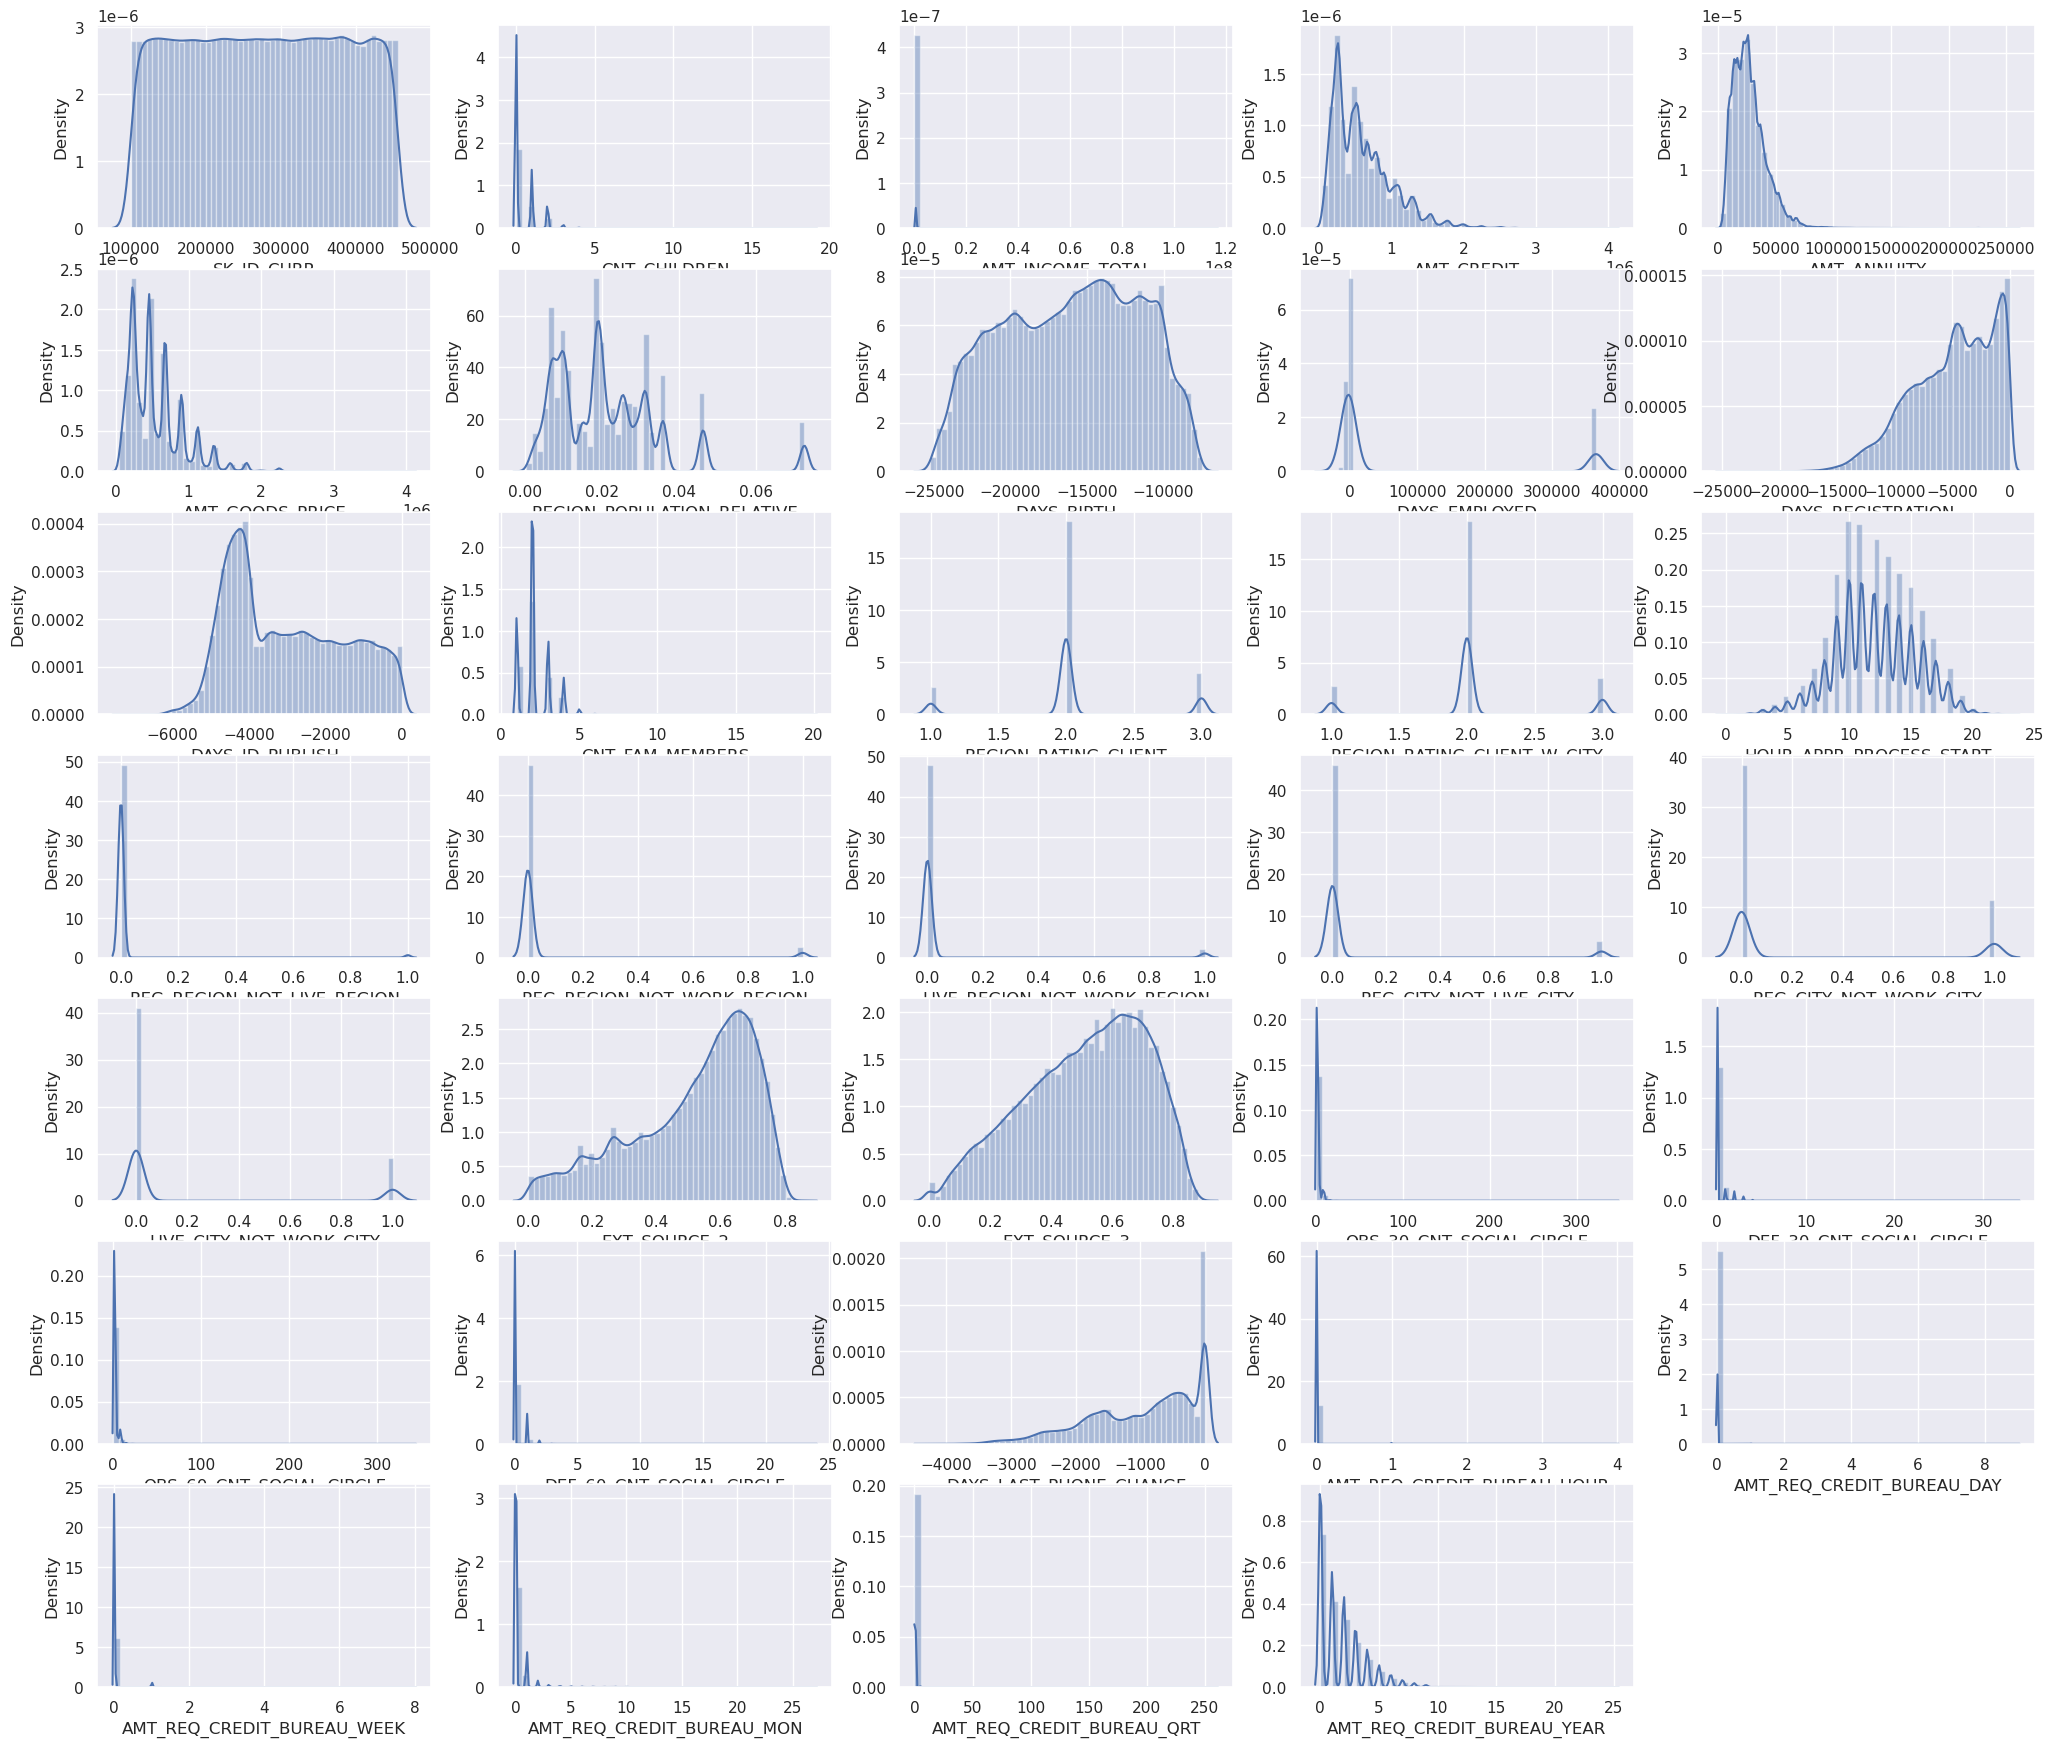

In [47]:
# draw histograms for each continuous column    
plt.figure(figsize=(25, 50))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.distplot(data[col])
   

In [48]:
data[cont_cols[1:10]].describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.454517   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868  -16036.995067   
std       3.692890e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  
count  307511.000000      307511.000000  
mean    63815.045904       -4986.120328  
std    141275.766519        3522.886321  
min    -17912.000000      -24672.000000  
25%     -2760.000000       -7479.500000  
50%     -1213.000000       -4504.000000  
75%      -289.000000       -2010.000000  
max    365243.000000           0.000000

In [49]:
data[cont_cols[10:18]].describe()

DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    307511.000000    307511.000000         307511.000000   
mean      -2994.202373         2.152664              2.052463   
std        1509.450419         0.910679              0.509034   
min       -7197.000000         1.000000              1.000000   
25%       -4299.000000         2.000000              2.000000   
50%       -3254.000000         2.000000              2.000000   
75%       -1720.000000         3.000000              2.000000   
max           0.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%                       2.000000                14.000000   
max                       3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  
count                307511.000000  
mean                      0.040659  
std                       0.197499  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       1.000000

In [50]:
data[cont_cols[18:27]].describe()

REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307511.000000           307511.000000   
mean                 0.078173                0.230454   
std                  0.268444                0.421124   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count            307511.000000  3.075110e+05  246546.000000   
mean                  0.179555  5.143927e-01       0.510853   
std                   0.383817  1.908550e-01       0.194844   
min                   0.000000  8.173617e-08       0.000527   
25%                   0.000000  3.929737e-01       0.370650   
50%                   0.000000  5.654672e-01       0.535276   
75%                   0.000000  6.634218e-01       0.669057   
max                   1.000000  8.549997e-01       0.896010   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  0.142944   
std                    2.398395                  0.446033   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             307511.000000             307511.000000  
mean                   1.400626                  0.099717  
std                    2.377224                  0.361735  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [51]:
data[cont_cols[27:]].describe()

DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307511.000000               307511.000000   
mean              -962.855657                    0.005538   
std                826.808966                    0.078014   
min              -4292.000000                    0.000000   
25%              -1570.000000                    0.000000   
50%               -757.000000                    0.000000   
75%               -274.000000                    0.000000   
max                  0.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               307511.000000  
mean                     1.643447  
std                      1.855821  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

# Findings
* Days in negatives! it may the data source give all days data with negatives, simplly I'll multiply it by -1
* DAYS_EMPLOYED have maximum value positive and it's 1000 years, also checking this link: https://www.kaggle.com/c/home-credit-default-risk/discussion/57248 the competition hosts mention that this value means infinty which we need to deal with it
* It says in the competition documentation that DAYS_EMPLOYED is 'How many days before the application the person started current employment' and the minimum value for that column is 49 years so still in the same job 50 years!! is kinda suspicious (Except for the very very loyal people which they don't exist :D )
*It seemes to me that maximum income is very suspicous as it's a very huge number comparing to Loan amount (Why someone income is 25 pounds and ask for 1 pound loan!).
*Maximum Age is 69 years old! and maximum employing time is 49 years old! -- i need to check weathr is theres any one have a number of employing days more than the number of birth days (Note: you will see the minimum in days is 69 years but as the values are negatives so we will consider as maximum)

# Deal with unreal value for DAYS_EMPLOYED

In [52]:
# Check weather is there inconsistent data 
data[(abs(data['DAYS_BIRTH']) < abs(data['DAYS_EMPLOYED'])) & (data['DAYS_EMPLOYED'] != 365243)]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

/tmp/ipykernel_460938/3370719184.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


<AxesSubplot: xlabel='YEARS_EMPLOYED', ylabel='Density'>

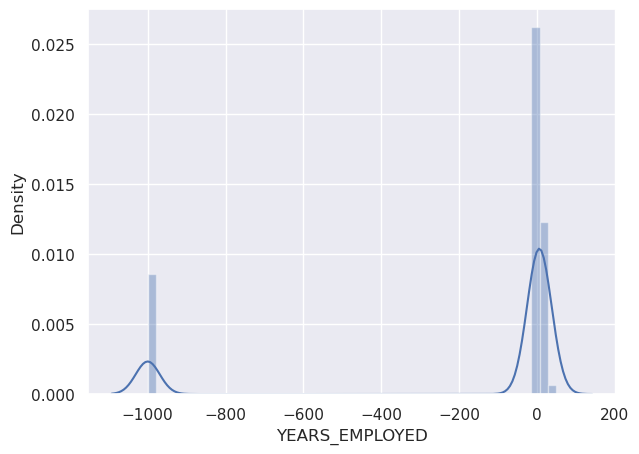

In [53]:
proper_days_employed_df = data
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


In [54]:
# I'll convert all values with 365243 to NaN then I will fill it with ( Average Employment time group by the education )

data['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True) 


/tmp/ipykernel_460938/3370719184.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


<AxesSubplot: xlabel='YEARS_EMPLOYED', ylabel='Density'>

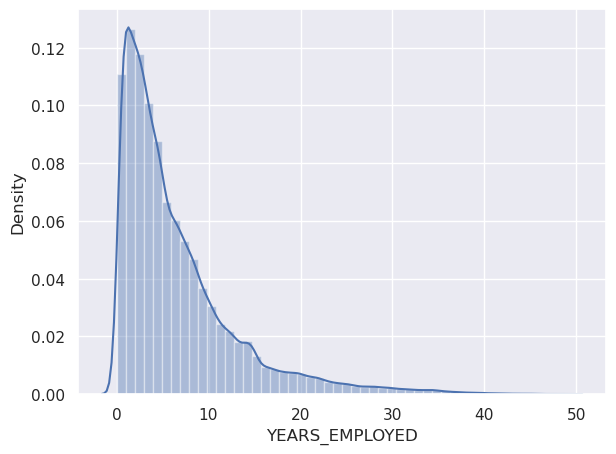

In [55]:
proper_days_employed_df = data
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


In [56]:
# See the average years between the Days_birth and Days_employed but also I will depend on the OCCUPATION_TYPE 

data.groupby(['OCCUPATION_TYPE'])['DAYS_EMPLOYED'].mean()

OCCUPATION_TYPE
Accountants             -2394.102823
Cleaning staff          -2131.155665
Cooking staff           -2152.466868
Core staff              -2797.755967
Drivers                 -1939.034618
HR staff                -2278.866785
High skill tech staff   -2739.979086
IT staff                -2095.570342
Laborers                -2424.143152
Low-skill Laborers      -1664.186813
Managers                -2759.318937
Medicine staff          -3750.265550
Private service staff   -2238.281297
Realty agents           -1785.003995
Sales staff             -1703.789421
Secretaries             -2607.050575
Security staff          -1904.809106
Waiters/barmen staff    -1873.172849
Name: DAYS_EMPLOYED, dtype: float64

## create Credit/Income and Annuity/Income percentages

In [57]:
## create Credit/Income and Annuity/Income percentages
data['Credit/Income'] = data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']
data['Annuity/Income'] = data['AMT_ANNUITY']/data['AMT_INCOME_TOTAL']


In [58]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [59]:
## show only clients with difficuties
data[data['TARGET']==1].sort_values(by='Credit/Income', ascending=True)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
197551      329042       1         Cash loans           F            Y   
106358      223392       1         Cash loans           M            Y   
91487       206240       1         Cash loans           M            N   
156330      281213       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
205575      338291       1         Cash loans           F            N   
678         100784       1         Cash loans           F            N   
255247      395348       1         Cash loans           F            N   
226137      361920       1         Cash loans           F            N   
20727       124157       1         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
197551               Y             0          405000.0     76410.0   
106358               Y             1          540000.0    106974.0   
91487                Y             1          225000.0     45000.0   
156330               Y             2          405000.0     83403.0   
...                ...           ...               ...         ...   
205575               N             0           36000.0   1223010.0   
678                  Y             0           54000.0   1885500.0   
255247               Y             1           58500.0   2146500.0   
226137               Y             0           45000.0   1800000.0   
20727                Y             0           25650.0   2173500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied               Working   
197551       9067.5          67500.0   Unaccompanied  Commercial associate   
106358       8451.0          94500.0   Unaccompanied               Working   
91487        5467.5          45000.0   Unaccompanied               Working   
156330      10026.0          72000.0          Family  Commercial associate   
...             ...              ...             ...                   ...   
205575      48627.0        1125000.0          Family             Pensioner   
678         74191.5        1885500.0   Unaccompanied             Pensioner   
255247      51340.5        2146500.0   Unaccompanied               Working   
226137      62698.5        1800000.0   Unaccompanied             Pensioner   
20727       48118.5        2173500.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
197551  Secondary / secondary special     Civil marriage  House / apartment   
106358  Secondary / secondary special            Married  House / apartment   
91487   Secondary / secondary special            Married  House / apartment   
156330               Higher education            Married  House / apartment   
...                               ...                ...                ...   
205575  Secondary / secondary special            Married  House / apartment   
678     Secondary / secondary special            Married  House / apartment   
255247  Secondary / secondary special            Married  House / apartment   
226137  Secondary / secondary special            Married  House / apartment   
20727   Secondary / secondary special     Civil marriage  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615         -922.0   
197551                    0.010556      -15023         -572.0   
106358                    0.006629      -13399        -1049.0   
91487                     0.015221      -11834        -1544.0   
156330                    0.018801      -14971        -3814.0   
..

# Check All categorical columns

In [63]:
cat_col = data.select_dtypes('object')
cat_col.describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq               278232      202452       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           307511           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            249818           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq               196434             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
count                      307511                  252137  
unique                          7                      57  
top                       TUESDAY  Business Entity Type 3  
freq                        53901                   67992

# Action will make for simpler data and filling the NaNs

* NAME_TYPE_SUIT will shorten the categories and merge Other_A, Other_B and Group of people to same Group called Others
* NAME_INCOME_TYPE will shorten the categories and merge Unemployed, student, Maternity leave to same group as logically all of them don't have source of money so will behave similarly regarding the target value
* ORGNIZATION_TYPE I'll take around 10-15 category and merge others to same group called Other
* we have +30% of OCCUPATION_TYPE in train and test data is NaNs, I'll fill it using the mode groupping by the  NAME_EDUCATION_TYPE because it's the most reasonable column who can refer to the occupation type
* we have +17% of EXT_SOURCE_3 in train and test data is NaNs, I'll fill it using the mean groupping by the OCUPPATION_TYPE
* we have +18% of ORGNIZATION_TYPE in train and test data is NaNs, I'll fill it using the mode groupping by the OCUPPATION_TYPE

In [65]:
data.groupby(['NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].agg(pd.Series.mode)

NAME_EDUCATION_TYPE
Academic degree                    Managers
Higher education                 Core staff
Incomplete higher                  Laborers
Lower secondary                    Laborers
Secondary / secondary special      Laborers
Name: OCCUPATION_TYPE, dtype: object

In [66]:
data['OCCUPATION_TYPE'].isnull().sum()

96391

# Imputing OCCUPATION_TYPE with NAME_EDUCATION_TYPE mode

In [67]:
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'] =  data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'].fillna('Core staff')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Incomplete higher'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Incomplete higher'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Lower secondary'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Lower secondary'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Academic degree'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Academic degree'].fillna('Managers')

/tmp/ipykernel_460938/3623890401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'].fillna('Laborers')
/tmp/ipykernel_460938/3623890401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'] =  data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'].fillna('Core staff')
/tmp/ipykernel_460938/3623890401.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [68]:
data.groupby(['OCCUPATION_TYPE'])['ORGANIZATION_TYPE'].agg(pd.Series.mode)

OCCUPATION_TYPE
Accountants              Business Entity Type 3
Cleaning staff           Business Entity Type 3
Cooking staff            Business Entity Type 3
Core staff               Business Entity Type 3
Drivers                  Business Entity Type 3
HR staff                 Business Entity Type 3
High skill tech staff    Business Entity Type 3
IT staff                 Business Entity Type 3
Laborers                 Business Entity Type 3
Low-skill Laborers       Business Entity Type 3
Managers                 Business Entity Type 3
Medicine staff                         Medicine
Private service staff             Self-employed
Realty agents                     Self-employed
Sales staff                       Self-employed
Secretaries                            Medicine
Security staff                         Security
Waiters/barmen staff     Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object

# The next cell is just imputing the NaNs in ORGANIZATION_TYPE based on the mode of every group in OCCUPATION_TYPE

In [69]:
data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Accountants') |
                               (data['OCCUPATION_TYPE'] == 'Cleaning staff') |
                               (data['OCCUPATION_TYPE'] == 'Cooking staff') |
                               (data['OCCUPATION_TYPE'] == 'Core staff')|
                               (data['OCCUPATION_TYPE'] == 'Drivers')|
                               (data['OCCUPATION_TYPE'] == 'HR staff')|
                               (data['OCCUPATION_TYPE'] == 'High skill tech staff')|
                               (data['OCCUPATION_TYPE'] == 'IT staff')|
                               (data['OCCUPATION_TYPE'] == 'Laborers')|
                               (data['OCCUPATION_TYPE'] == 'Low-skill Laborers')|
                               (data['OCCUPATION_TYPE'] == 'Managers')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Accountants') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Cleaning staff') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Cooking staff') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Core staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Drivers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'HR staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'High skill tech staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'IT staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Laborers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Low-skill Laborers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Managers')].fillna('Business Entity Type 3')



data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Medicine staff')|
                              (data['OCCUPATION_TYPE'] == 'Secretaries')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Medicine staff')|
                                                                                                                  (data['OCCUPATION_TYPE'] == 'Secretaries')].fillna('Medicine')

data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Private service staff')|
                               (data['OCCUPATION_TYPE'] == 'Realty agents')|
                               (data['OCCUPATION_TYPE'] == 'Sales staff')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Private service staff')|
                                                                                                                 (data['OCCUPATION_TYPE'] == 'Realty agents')|
                                                                                                                 (data['OCCUPATION_TYPE'] == 'Sales staff')].fillna('Self-employed')

data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Security staff')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Security staff')].fillna('Security')



/tmp/ipykernel_460938/3442090779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Accountants') |
/tmp/ipykernel_460938/3442090779.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Medicine staff')|
/tmp/ipykernel_460938/3442090779.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ORGANIZATION_TYPE'][(data['OCCUP

In [70]:
data['OCCUPATION_TYPE'].isnull().sum()

0

# Convirting Small categories "into Others"

*  I'll take Only the first 15 Categories and I'll convirt the rest to "Others" not "Other" because we already have a group called "Other: and i want to put them in a different group


In [71]:
data['ORGANIZATION_TYPE'].value_counts(normalize = True)

Business Entity Type 3    0.401176
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services                  0.005122
University          

In [72]:
others = data['ORGANIZATION_TYPE'].value_counts().index[15:]
label = 'Others'
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace(others, label)


In [73]:
data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Others',
       'Other', 'Medicine', 'Business Entity Type 2', 'Self-employed',
       'Construction', 'Kindergarten', 'Trade: type 7',
       'Transport: type 4', 'Business Entity Type 1', 'Trade: type 3',
       'Industry: type 3', 'Industry: type 9'], dtype=object)

In [74]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

EXT_SOURCE_3      19.825307
DAYS_EMPLOYED     18.007161
YEARS_EMPLOYED    18.007161
dtype: float64

In [75]:
data.shape

(307511, 76)

In [76]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# Imputing DAYS_EMPLOYED and YEARS_EMPLOYED
* We assume most of workers start at 20 Years old = 7305 days

In [77]:
data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"]

8        -20099
11       -20417
23       -24827
38       -23920
43       -23548
          ...  
307469   -22414
307483   -24911
307487   -23125
307505   -24384
307507   -20775
Name: DAYS_BIRTH, Length: 55374, dtype: int64

In [78]:
data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"] + 7305

8        -12794
11       -13112
23       -17522
38       -16615
43       -16243
          ...  
307469   -15109
307483   -17606
307487   -15820
307505   -17079
307507   -13470
Name: DAYS_BIRTH, Length: 55374, dtype: int64

In [79]:
data.loc[data["DAYS_EMPLOYED"].isna(),["DAYS_EMPLOYED"]] = data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"] + 7305

In [80]:
round(data[data["YEARS_EMPLOYED"].isna()]["DAYS_EMPLOYED"] / 365.25)

8        -35.0
11       -36.0
23       -48.0
38       -45.0
43       -44.0
          ... 
307469   -41.0
307483   -48.0
307487   -43.0
307505   -47.0
307507   -37.0
Name: DAYS_EMPLOYED, Length: 55374, dtype: float64

In [81]:
data.loc[data["YEARS_EMPLOYED"].isna(),["YEARS_EMPLOYED"]] = round(data[data["YEARS_EMPLOYED"].isna()]["DAYS_EMPLOYED"] / 365.25)

In [82]:
"""data.drop(['DAYS_EMPLOYED'], axis = 1,inplace=True)
data.drop(['YEARS_EMPLOYED'], axis = 1,inplace=True)"""

"data.drop(['DAYS_EMPLOYED'], axis = 1,inplace=True)\ndata.drop(['YEARS_EMPLOYED'], axis = 1,inplace=True)"

In [83]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

EXT_SOURCE_3    19.825307
dtype: float64

# Deleting remaining NaN

In [84]:

data.drop(['EXT_SOURCE_3'], axis = 1,inplace=True)


In [85]:
data.shape

(307511, 75)

In [86]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# DATA Cleaned ?

In [87]:
print(data['TARGET'].isnull().sum())

0


<AxesSubplot: ylabel='count'>

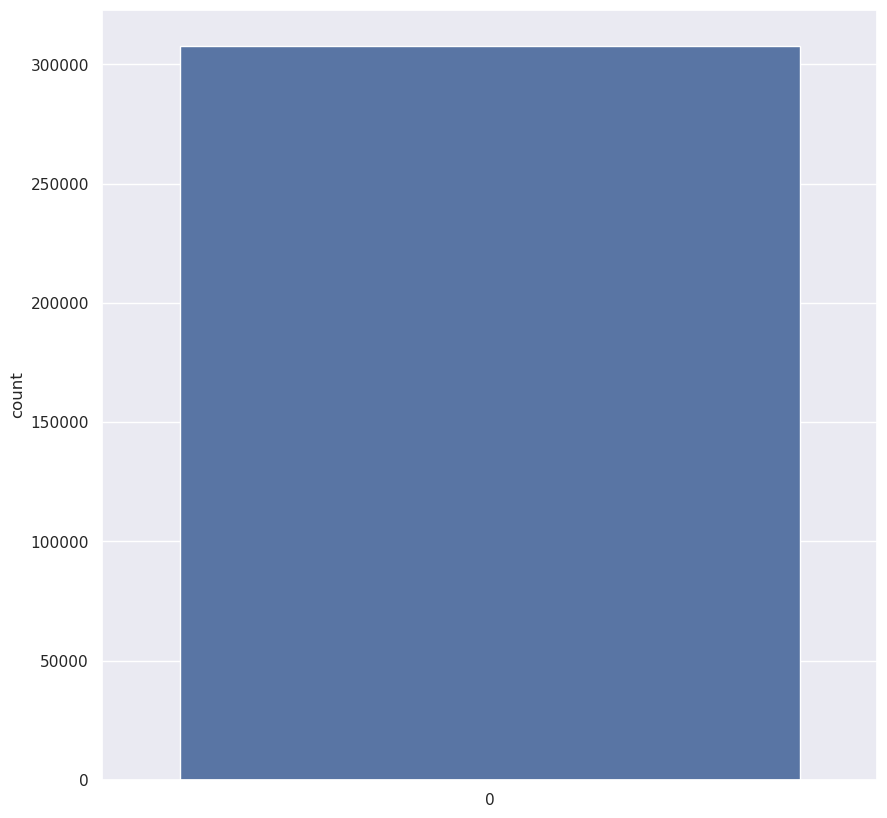

In [88]:
plt.figure(figsize=(10,10))
sns.countplot(data['TARGET'])

In [89]:
# It's very obvious that we have imbalanced data, class(1) is about 8% of the data
data['TARGET'].value_counts(normalize=True).reset_index()

index    TARGET
0      0  0.919271
1      1  0.080729

# Data is imbalanced so:
* I'll Consider tha class_weight solution for this problem when we go to the modeling phase (We can use under smapling or over sampling but for me because of the huge difference between both classes, class weight is the best solution)
* Accuracy is not a proper evaluation metric, it will be misleading so we will need to check another metric (e.g. roc_auc).

# Bivariate Analysis

# Which gender applys more for loans?

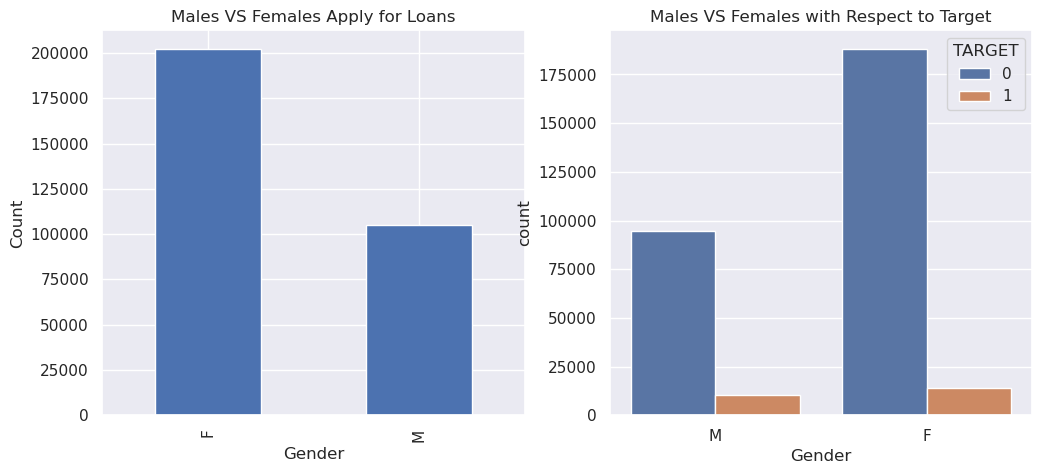

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64
----------------------------------------
TARGET  CODE_GENDER
0       F              0.666046
        M              0.333954
1       F              0.570796
        M              0.429204
Name: CODE_GENDER, dtype: float64
----------------------------------------
CODE_GENDER  TARGET
F            0         0.930008
             1         0.069992
M            0         0.898581
             1         0.101419
Name: TARGET, dtype: float64


In [90]:
# Which gender applys more for loans?
# Is there relation between the gender and the ability to repay?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['CODE_GENDER'].value_counts().plot(kind='bar', title='Males VS Females Apply for Loans');
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='CODE_GENDER', hue='TARGET');
plt.title('Males VS Females with Respect to Target')
plt.xlabel('Gender')
plt.show()

print(data['CODE_GENDER'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['TARGET'])['CODE_GENDER'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['CODE_GENDER'])['TARGET'].value_counts(normalize=True))

* Females applys for loans more than Males
* Gender not affect in our Target because the difference between the gender are only 3% ( we can't relay on it)

# Which type of loan contract clients applys more for?

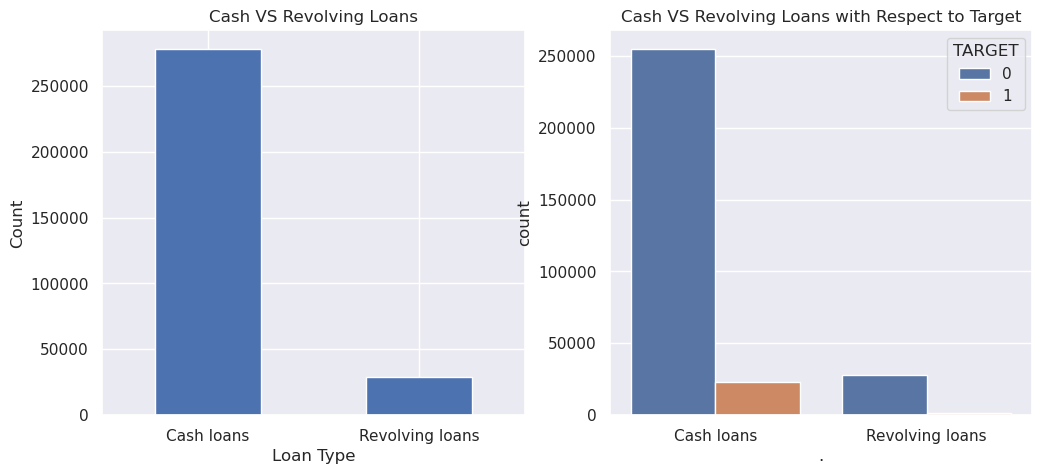

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
----------------------------------------
TARGET  NAME_CONTRACT_TYPE
0       Cash loans            0.902100
        Revolving loans       0.097900
1       Cash loans            0.935388
        Revolving loans       0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64


In [91]:
# Which type of loan contract clients applys more for?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Cash VS Revolving Loans');
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Cash VS Revolving Loans with Respect to Target')
plt.xlabel('.')
plt.show()

print(data['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['TARGET'])['NAME_CONTRACT_TYPE'].value_counts(normalize=True))

* Most of the clients take cash loans
* It seems to me that this feature has no effect on the target

# Is there relation between the age and the ability to repay?

/tmp/ipykernel_460938/3685922628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
/tmp/ipykernel_460938/3685922628.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Can Repay');
/tmp/ipykernel_460938/3685922628.py:11: UserW

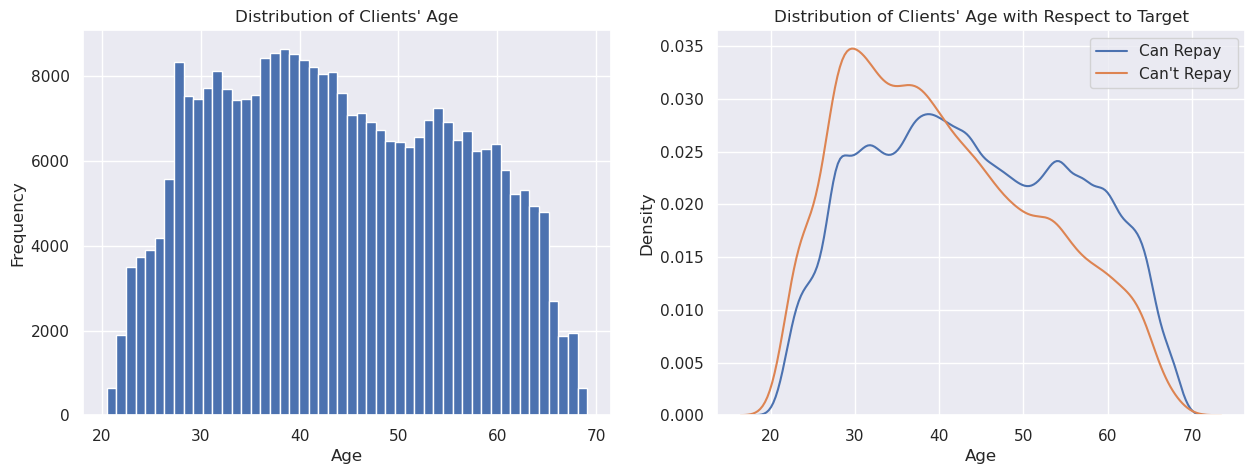

In [92]:

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(data['DAYS_BIRTH']/-365.25).plot(kind='hist', bins=50, title='Distribution of Clients\' Age');
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_day_birth_df = data[['DAYS_BIRTH', 'TARGET']]
proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Can Repay');
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==1]['DAYS_BIRTH'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend();
plt.show()

* Clients aged about 30 years are more likely to have difficulties with repay, where those aged about 40 and more can repay well.
* This feature will be important for the model.

# Does the client's No. of children affect the ability to repay?

/tmp/ipykernel_460938/2100116653.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['TARGET']==0]['CNT_CHILDREN'], hist=False, label='Can Repay');
/tmp/ipykernel_460938/2100116653.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['TARGET']==1]['CNT_CHILDR

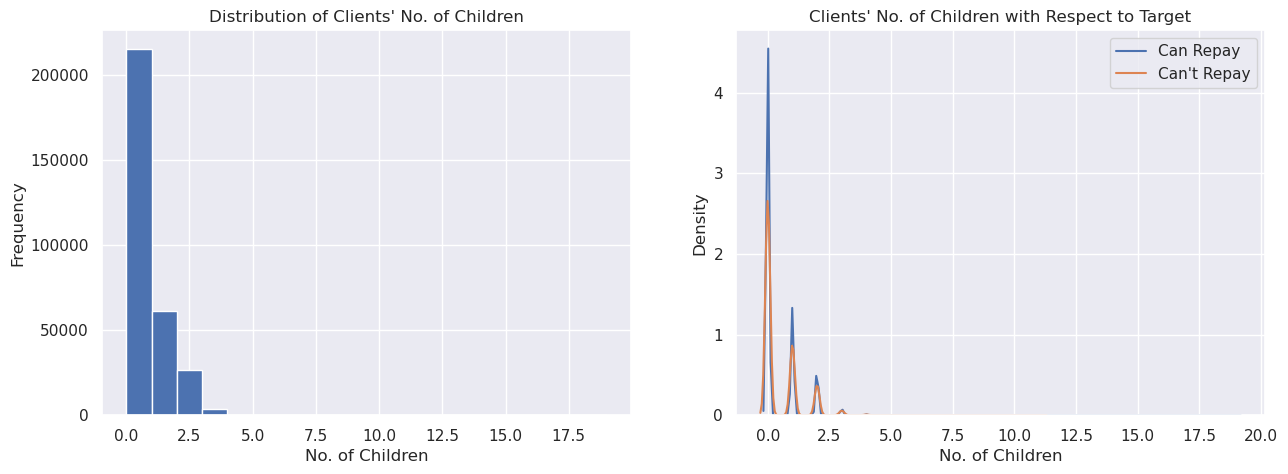

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['CNT_CHILDREN'].plot(kind='hist', bins=19, title='Distribution of Clients\' No. of Children');
plt.xlabel('No. of Children')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.distplot(data[data['TARGET']==0]['CNT_CHILDREN'], hist=False, label='Can Repay');
sns.distplot(data[data['TARGET']==1]['CNT_CHILDREN'], hist=False, label='Can\'t Repay');
plt.title('Clients\' No. of Children with Respect to Target')
plt.xlabel('No. of Children')
plt.legend()
plt.show()

* Client's without any children applys for loans more than others, and with increasing No. of children, client's don't tend to loan

# Is there a relation between client income ant the amount of loan apply for?



# Does income and credit affect in the ability to repay?

In [94]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

/tmp/ipykernel_460938/4141652105.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can Repay');
/tmp/ipykernel_460938/4141652105.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

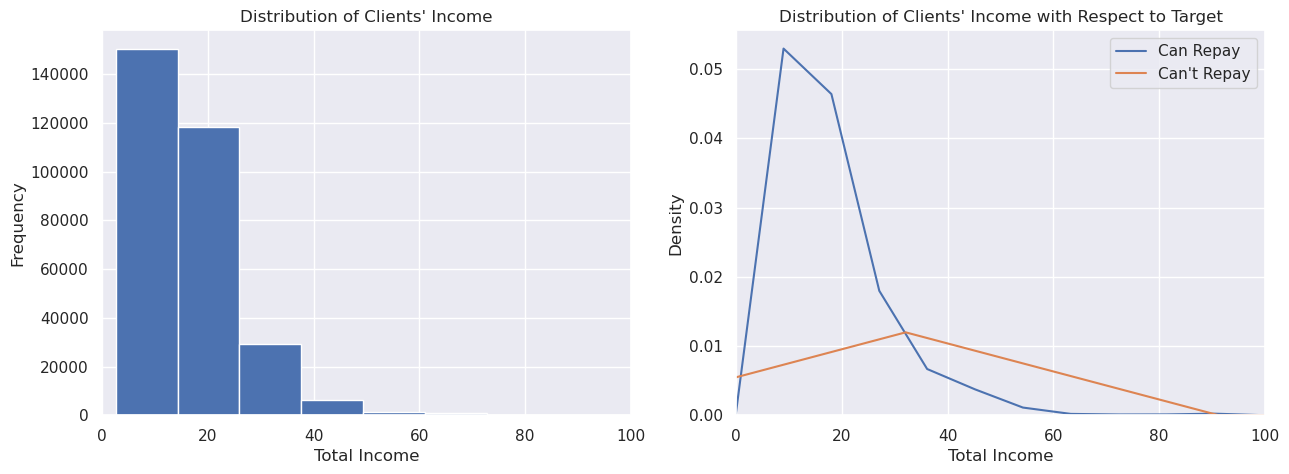

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
proper_income_df = data.copy()
proper_income_df['AMT_INCOME_TOTAL'] = proper_income_df['AMT_INCOME_TOTAL']/10000
proper_income_df['AMT_INCOME_TOTAL'].plot(kind='hist', bins=1000, title='Distribution of Clients\' Income');
plt.xlabel('Total Income')
plt.xlim([0,100])

plt.subplot(1, 2, 2)
sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can\'t Repay');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('Total Income')
plt.xlim([0,100])
plt.legend();
plt.show()

<Figure size 800x800 with 0 Axes>

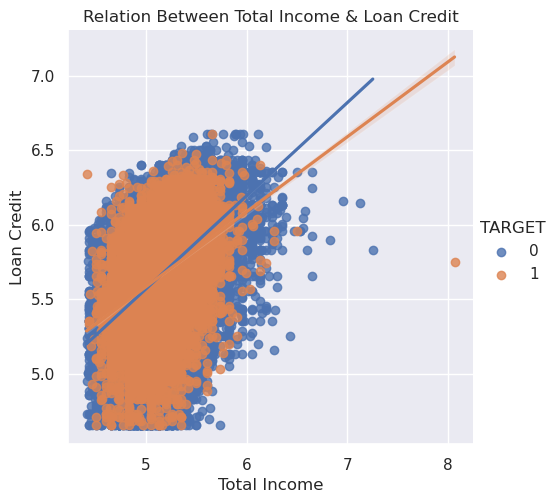

/tmp/ipykernel_460938/133943455.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['log_AMT_CREDIT'], hist=False, label='Can Repay');
/tmp/ipykernel_460938/133943455.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_in

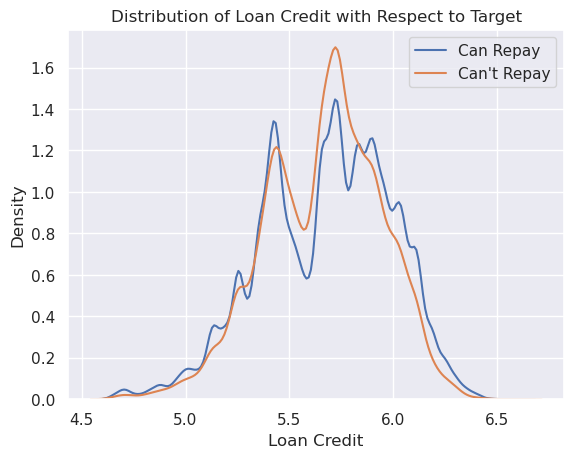

In [96]:
proper_income_df['log_AMT_INCOME_TOTAL'] = np.log10(proper_income_df['AMT_INCOME_TOTAL']*10000)
proper_income_df['log_AMT_CREDIT'] = np.log10(proper_income_df['AMT_CREDIT'])

plt.figure(figsize=(8,8))
sns.lmplot(x='log_AMT_INCOME_TOTAL', y='log_AMT_CREDIT', data=proper_income_df, hue='TARGET');
plt.title('Relation Between Total Income & Loan Credit')
plt.xlabel('Total Income')
plt.ylabel('Loan Credit')
plt.show()

sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['log_AMT_CREDIT'], hist=False, label='Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['log_AMT_CREDIT'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Loan Credit with Respect to Target');
plt.xlabel('Loan Credit')
plt.legend();

* Client's with low income tends to apply for loans more than others with high income.
* The more client's income is, the larger loan amount apply for.
* Client't with income more than 3M tends always to repay, so this feature may help in our target (Frist Graph on the right)
* Clients with income between 10 and 18 are less likely to repay, vice versa. (Frist Graph on the right)
* I can see that Loan Credit isn't affect the Target Distirbution

# what's most income type of clients?

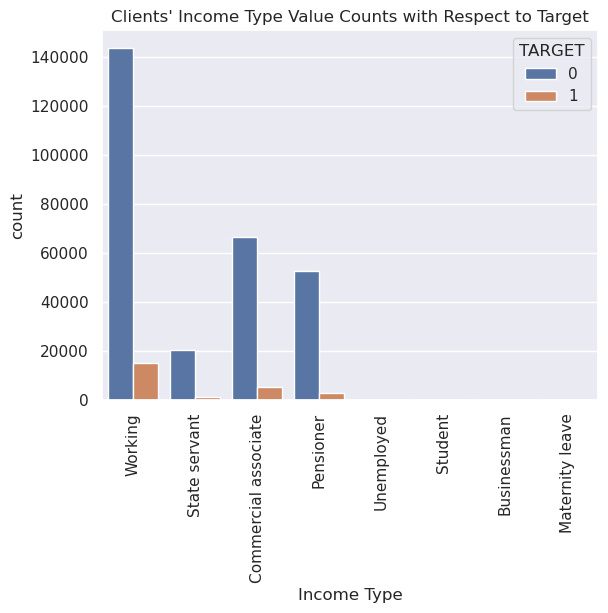

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

In [97]:
ax = sns.countplot(data=data, x='NAME_INCOME_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

* Working clients are more willing to apply for loans more than others.
* Altought a few businessmen and students apply for loans, but they always repay.

# what's most high education degree for clients?

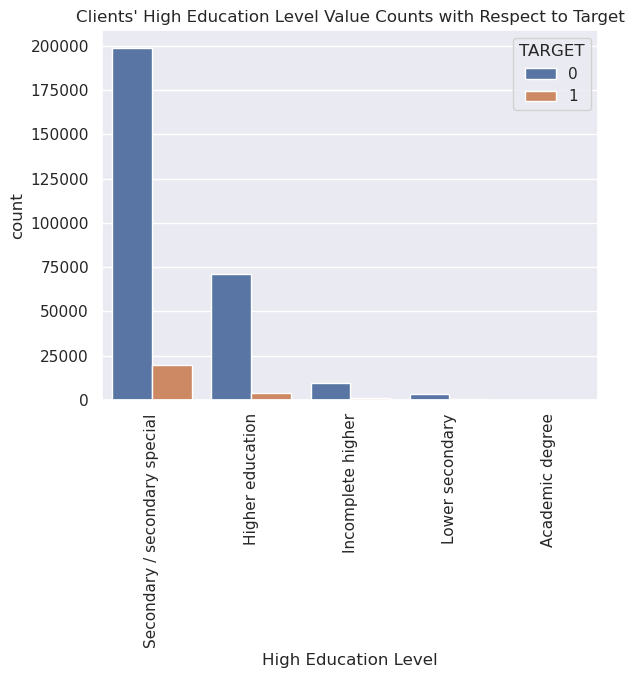

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64

In [98]:
ax = sns.countplot(data=data, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' High Education Level Value Counts with Respect to Target')
plt.xlabel('High Education Level')
plt.show()

print('\n'*2)
data.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

* Clients with Secondary high education level are more willing to apply for loans more than others.
* Almost 98% of clients with Academic degree high education level can repay their loans.

# IS there relation between employment year and the ability to repay

/tmp/ipykernel_460938/2367477576.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])
/tmp/ipykernel_460938/2367477576.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proper_days_employed_df[proper_days_employed_df['TARGET']==0]['YEARS_EMPL

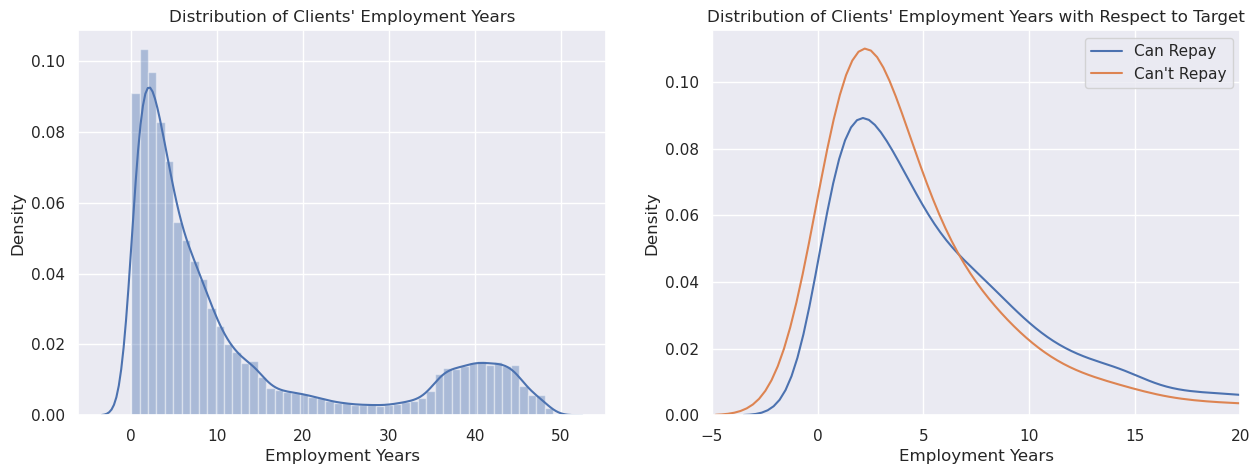

In [99]:
proper_days_employed_df = data.copy()
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])
plt.title('Distribution of Clients\' Employment Years')
plt.xlabel('Employment Years')

plt.subplot(1, 2, 2)
sns.distplot(proper_days_employed_df[proper_days_employed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label='Can Repay');
sns.distplot(proper_days_employed_df[proper_days_employed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Employment Years with Respect to Target');
plt.xlim([-5,20])
plt.xlabel('Employment Years')
plt.legend();

In [100]:
proper_days_employed_df['YEARS_EMPLOYED'] 

0          1.744011
1          3.252567
2          0.616016
3          8.320329
4          8.317591
            ...    
307506     0.646133
307507    36.878850
307508    21.686516
307509    13.103354
307510     3.455168
Name: YEARS_EMPLOYED, Length: 307511, dtype: float64

# categorical variables among the target to see weather any pattern¶

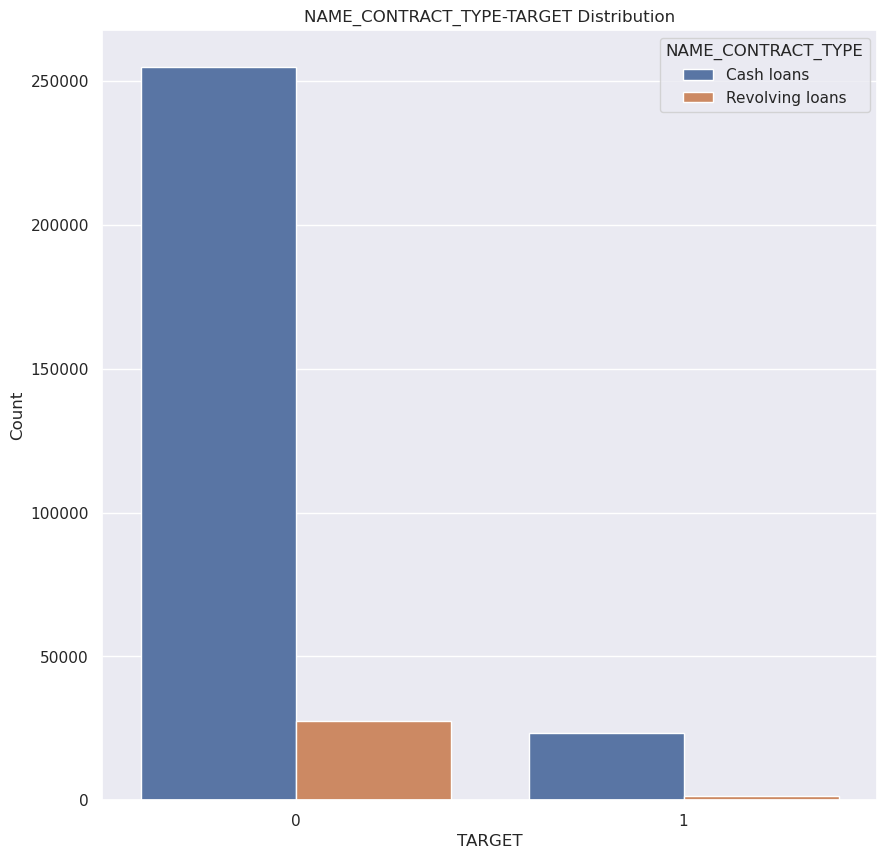

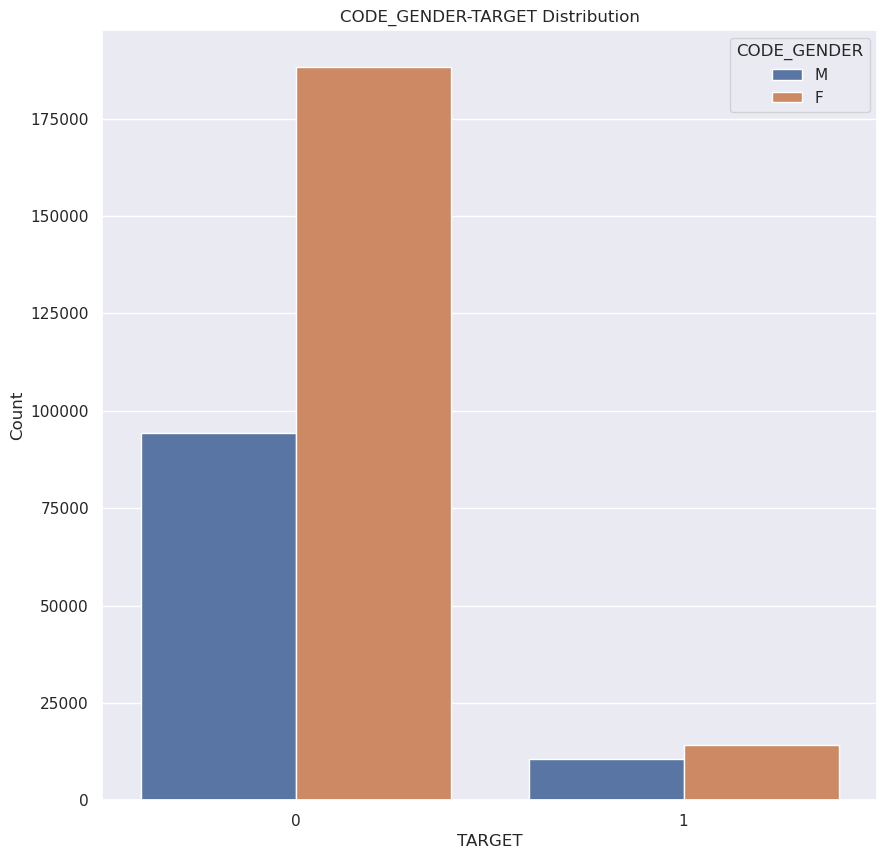

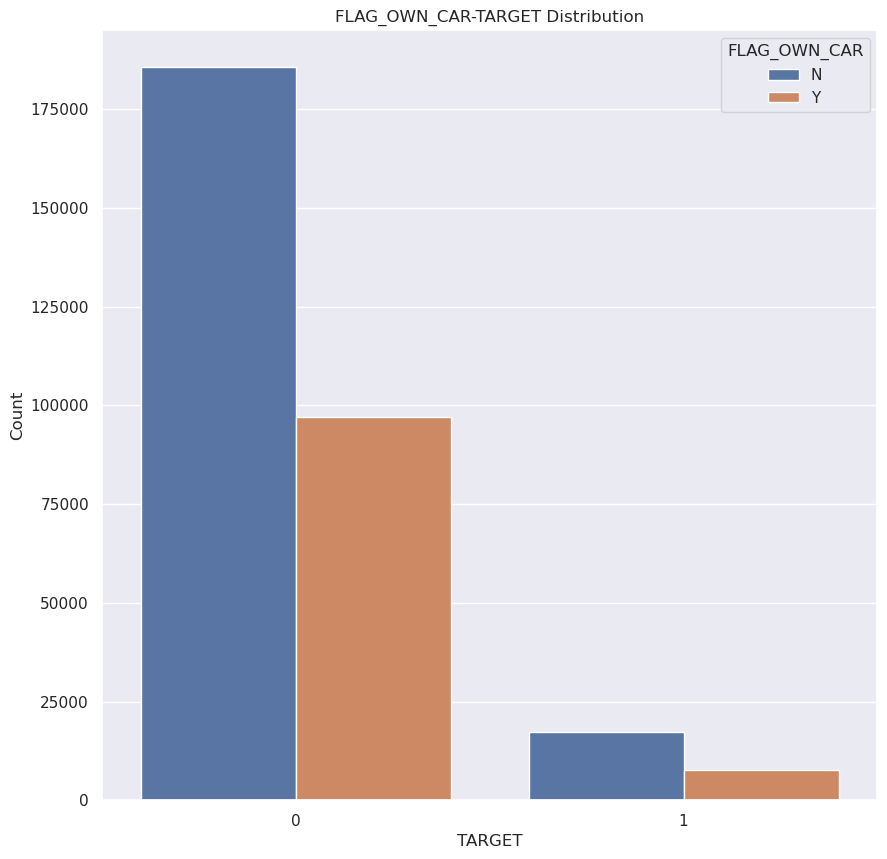

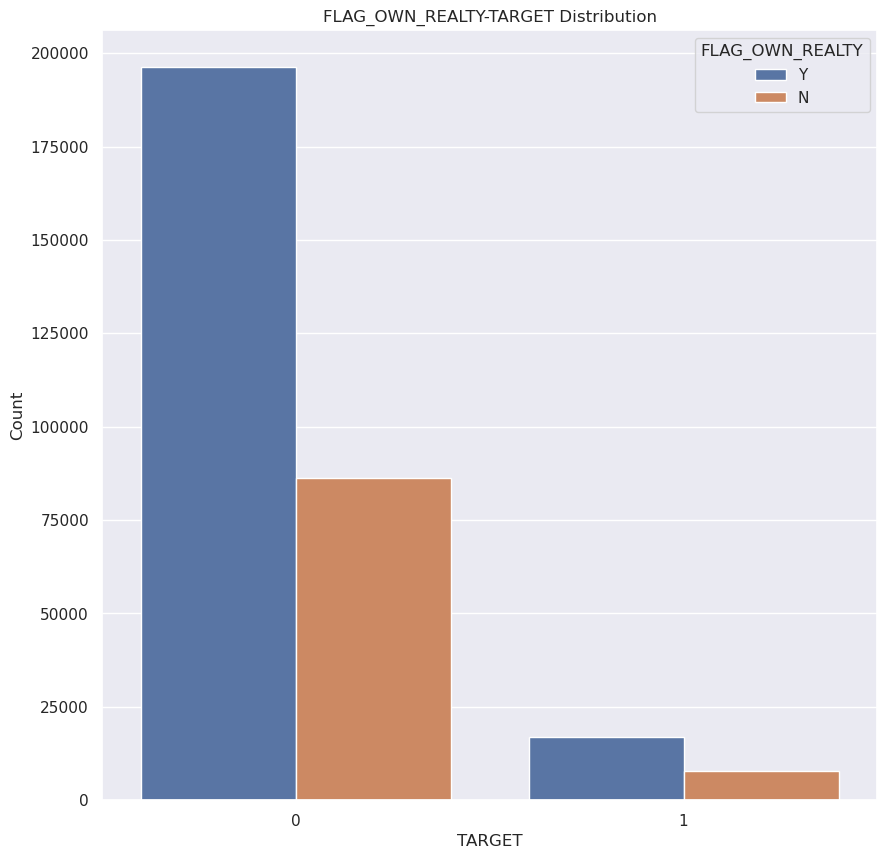

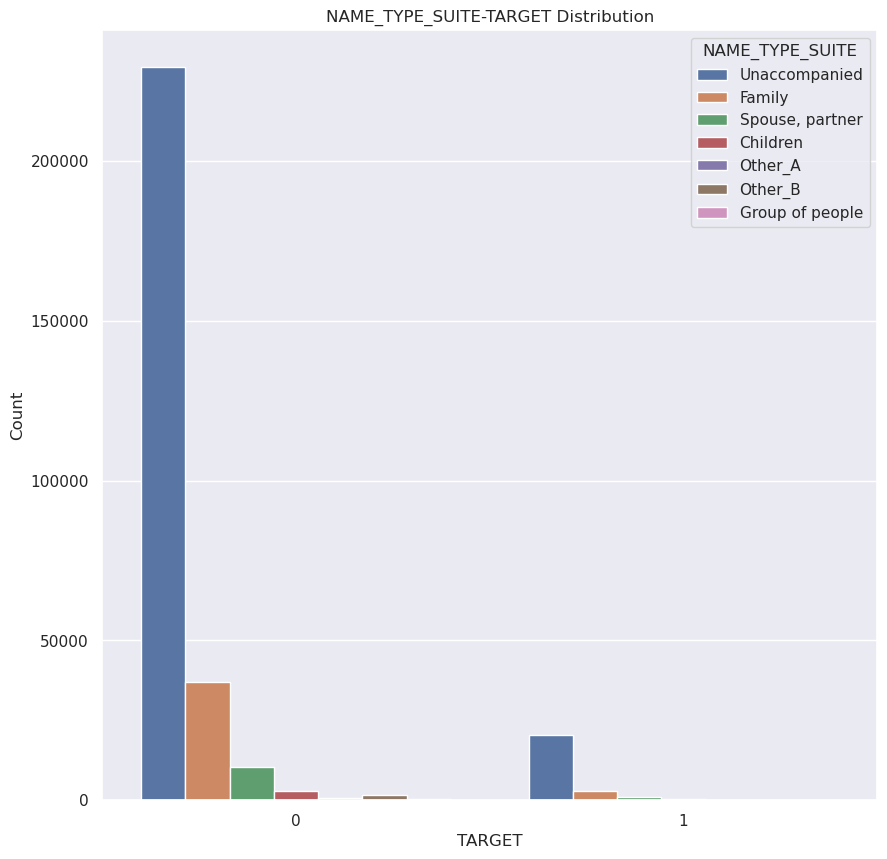

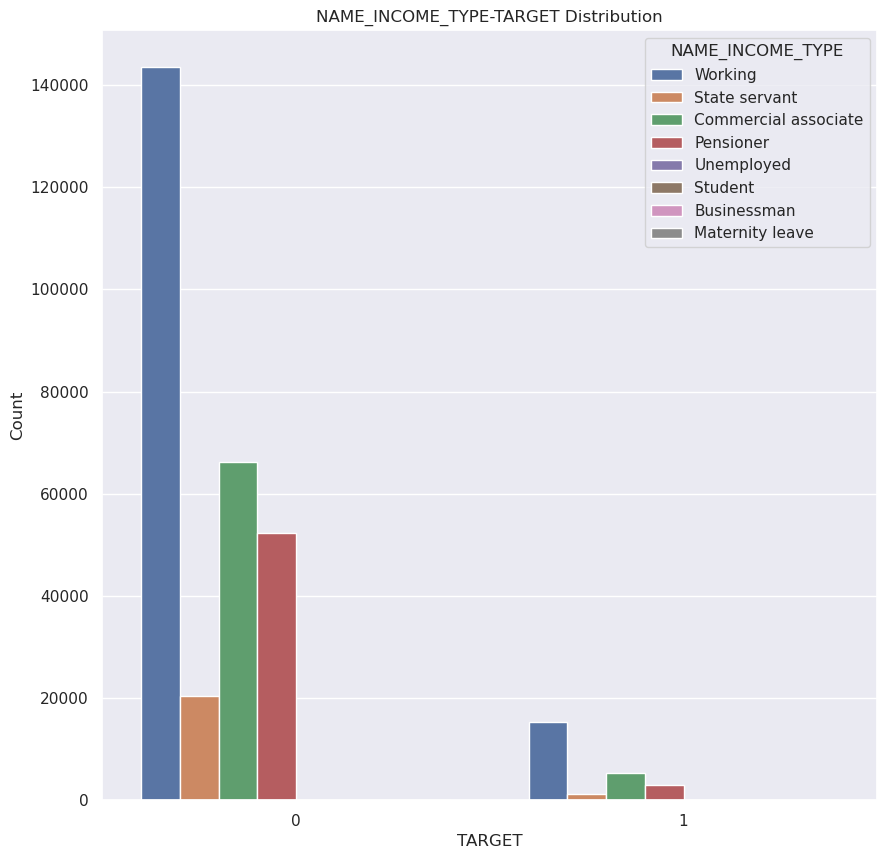

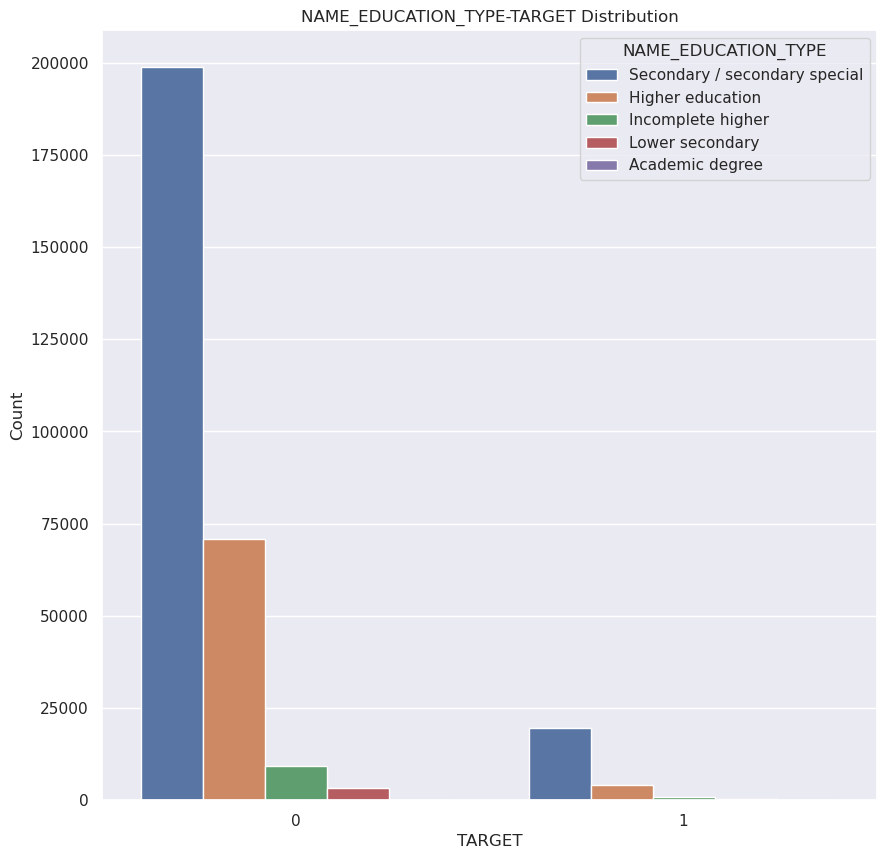

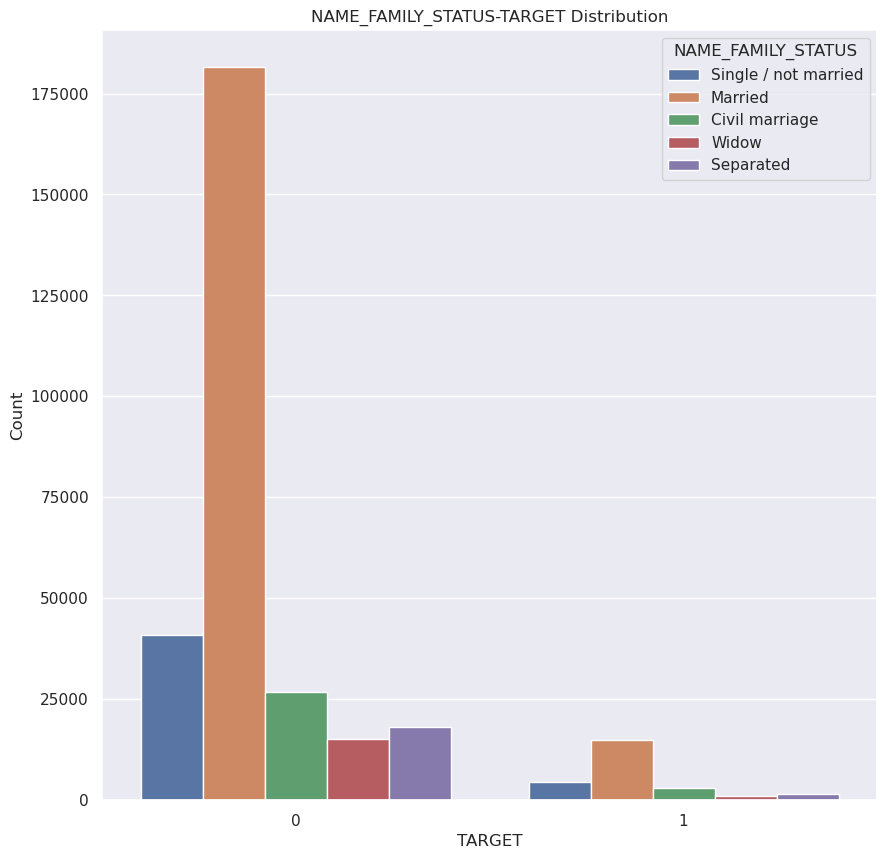

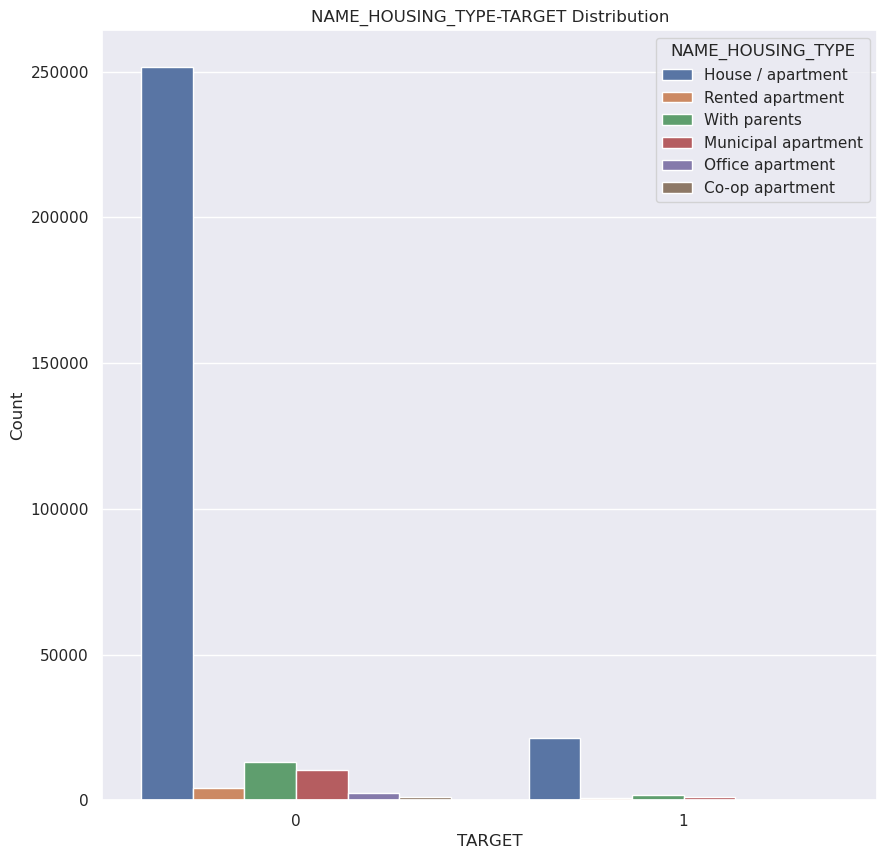

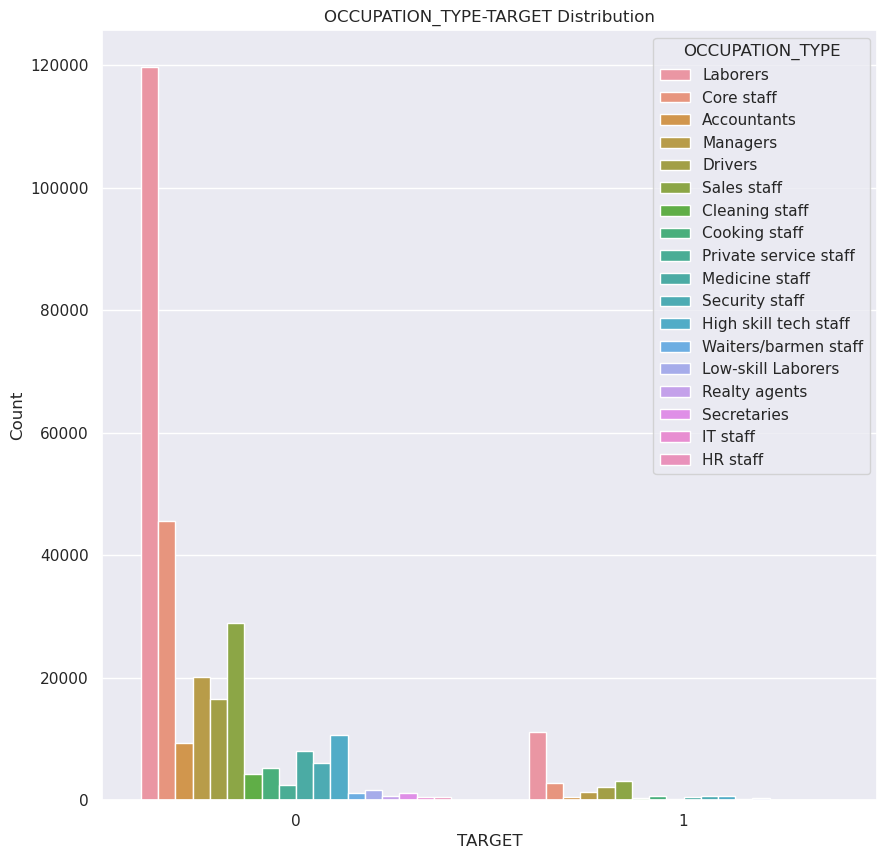

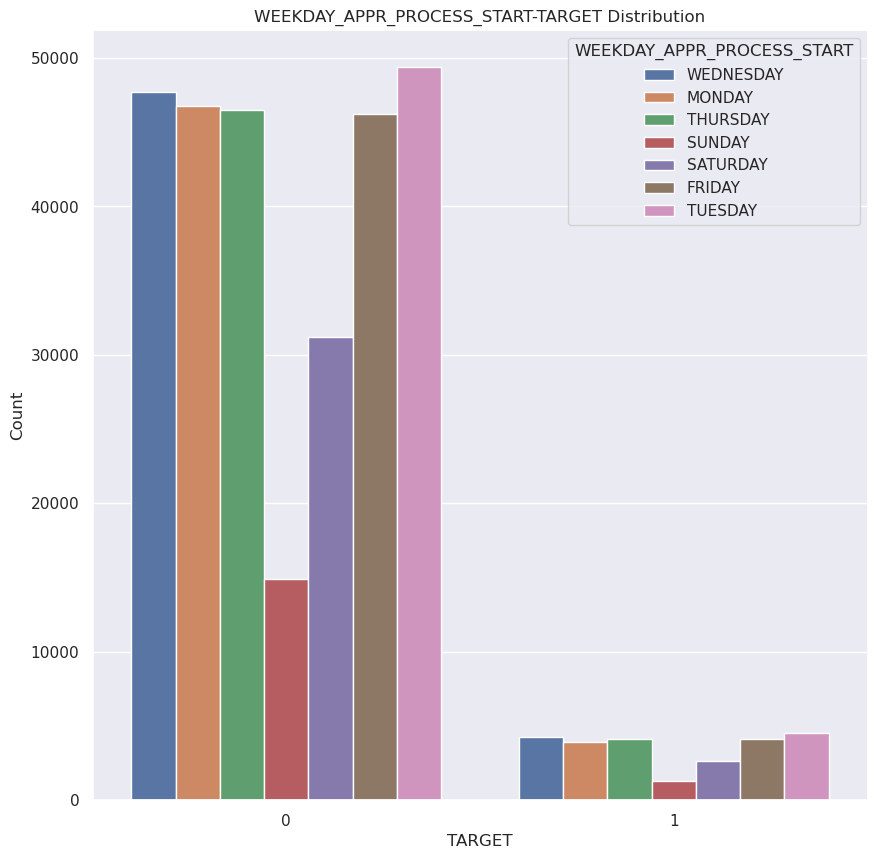

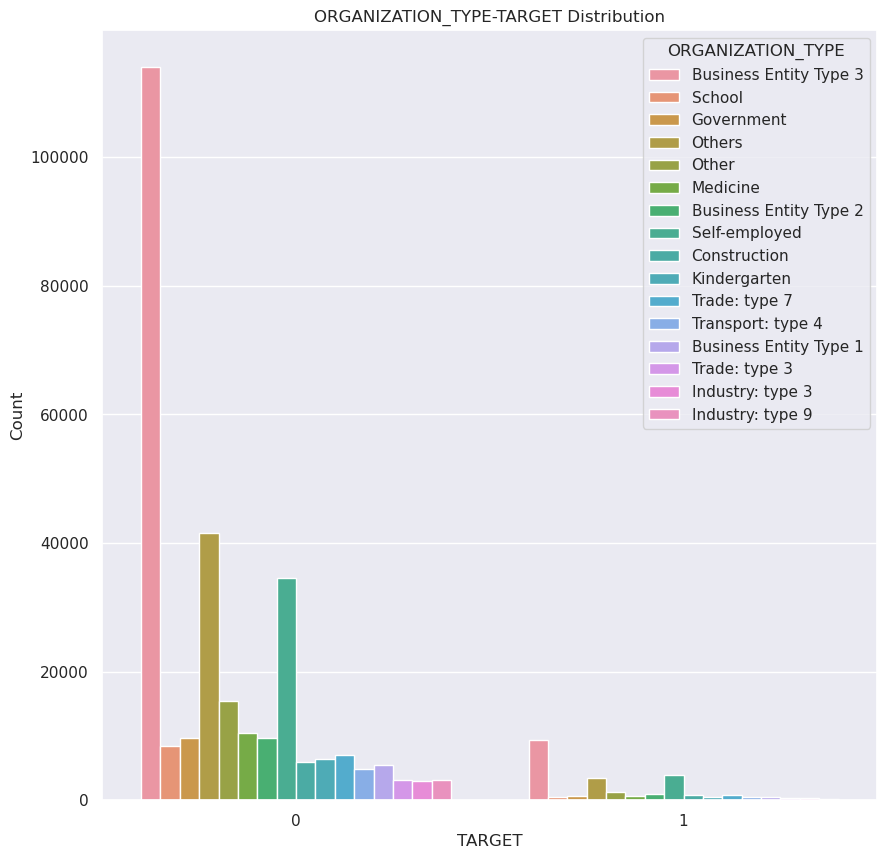

In [101]:
for i in cat_col:
    plt.figure(figsize=(10,10))
    sns.countplot(data = data, x = 'TARGET', hue= i)
    plt.xlabel('TARGET')
    plt.ylabel('Count')
    plt.title(f'{i}-TARGET Distribution')
    plt.show()

I see most of the data aren't give much informaion about the categories, so i may go for statistical approach to test the dependancy for each variable and the TARGET

In [102]:
def dependency(data, feature):
    
    table = pd.crosstab(data['TARGET'], data[feature])
    stat, p, dof, expected = chi2_contingency(table) 
    
    print(feature)
    print("Degree of freedom: ", dof)
    significance_level = 0.05
    print("p value: " + str(p)) 

    if p <= significance_level: 
        print( 'REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT') 
    else: 
        print('{}: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT')
    print()

In [103]:
from scipy.stats import chi2_contingency

In [104]:
for i in cat_col.columns:
    dependency(data,i)

NAME_CONTRACT_TYPE
Degree of freedom:  1
p value: 1.0235150721172847e-65
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

CODE_GENDER
Degree of freedom:  1
p value: 4.183493188620687e-202
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

FLAG_OWN_CAR
Degree of freedom:  1
p value: 9.330994431109667e-34
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

FLAG_OWN_REALTY
Degree of freedom:  1
p value: 0.0006681470317545887
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

NAME_TYPE_SUITE
Degree of freedom:  6
p value: 1.669680344640331e-05
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

NAME_INCOME_TYPE
Degree of freedom:  7
p value: 1.9281456056858933e-266
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

NAME_EDUCATION_TYPE
Degree of freedom:  4
p value: 2.4476812052198174e-219
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

NAME_FAMILY_STATUS
Degree of freedom:  4
p value: 6.983958115483933e-108
REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT

NAME_HOUSING_

# CORRELATION

In [105]:
cont_cols.remove('EXT_SOURCE_3')

In [106]:
cont_cols_with_target = cont_cols + ['TARGET']

In [107]:
ext_data = data[cont_cols_with_target]
ext_data_corrs = ext_data.corr()

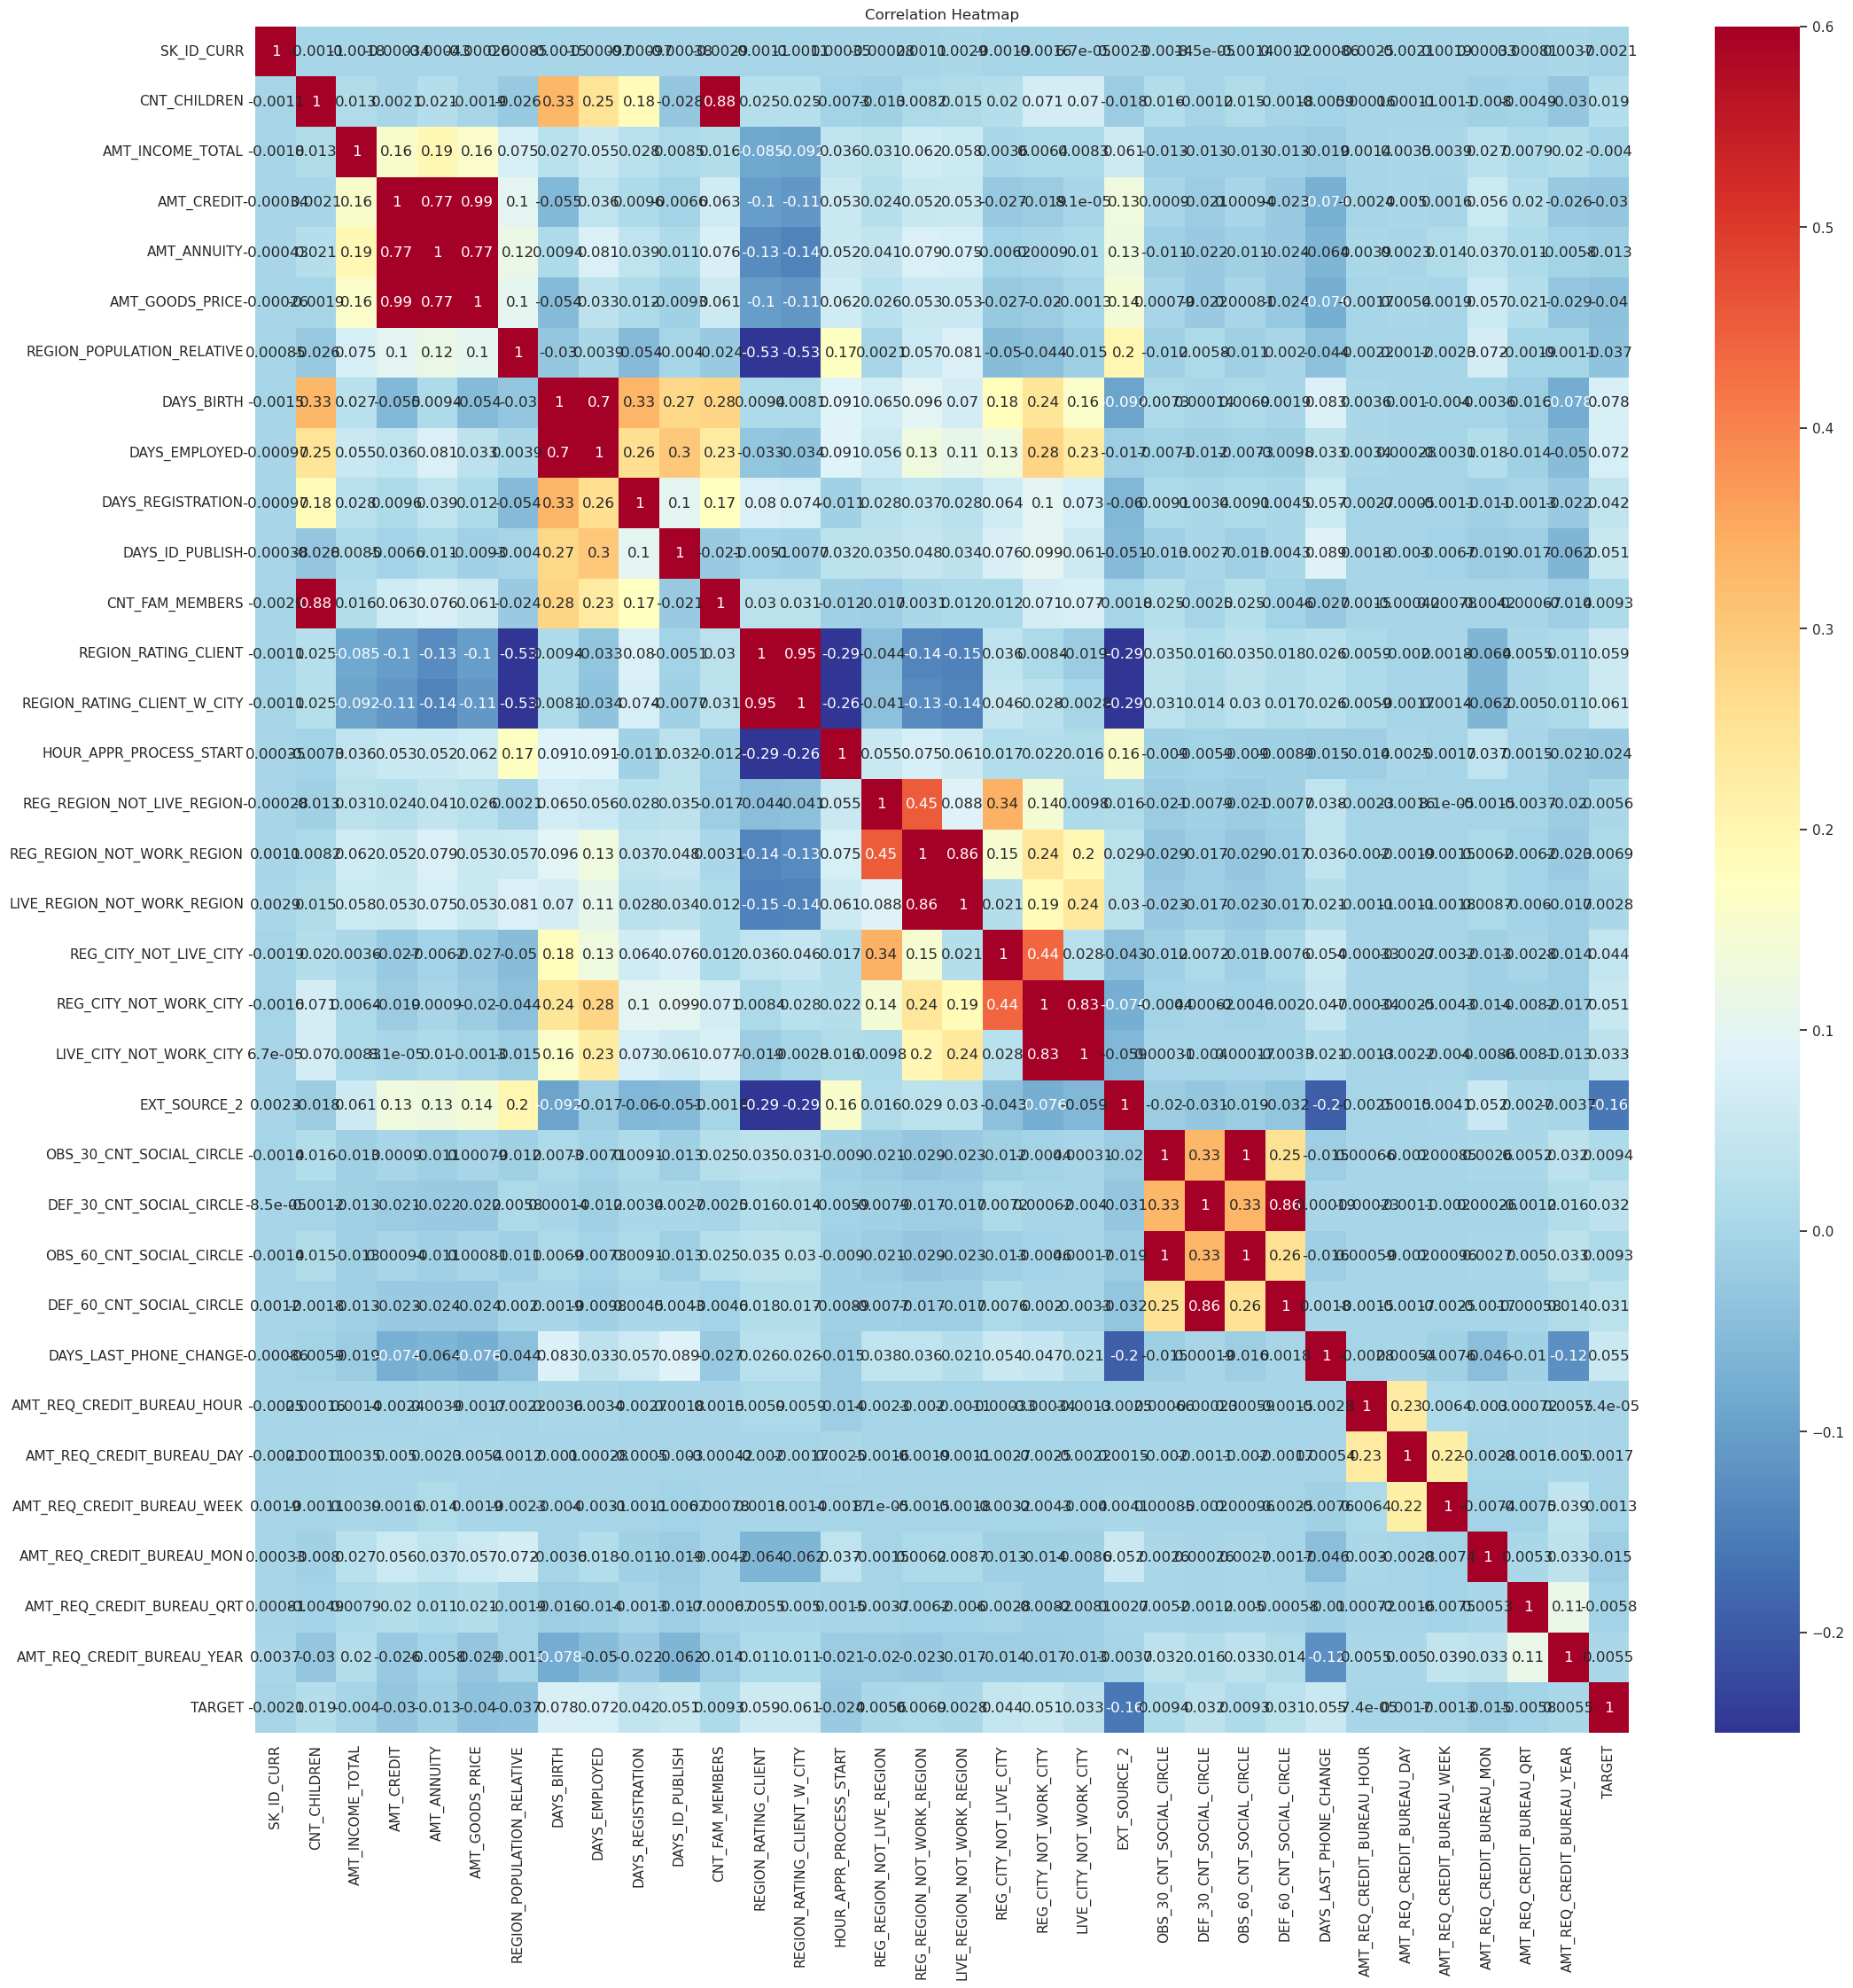

In [108]:
plt.figure(figsize = (25, 25))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Findings
* CNT_CHILDREN AND CNT_FAM_MEMBERS have 0.88 correlation
* AMT_CREDIT AND AMT_GOOD_PRICE have 0.99 correlation
* AMT_CREDIT AND AMT_ANNUITY have 0.77 correlation
* REGION_RATING_CLINET AND REGION_RATING_CLIENT_W_CITY have 0.95 correlation
* REG_REGION_NOT_WORK_REGION AND LIVE_REGION_NOT_WORK_REGION have 0.86 correlation
* REG_CITY_NOT_WORK_CITY AND LIVE_CITY_NOT_WORK_CITY have 0.83 correlation
* OBS_30_CNT_SOCIAL_CIRCLE AND OBS_60_CNT_SOCIAL_CIRCLE have 1 correlation
* DEF_30_CNT_SOCIAL_CIRCLE AND DEF_60_CNT_SOCIAL_CIRCLE have 0.86 correlation
* I will drop one of every pairs (the one who is less correlated with the TARGET)¶

In [109]:
ext_data_corrs['TARGET'].abs().sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.072438
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055217
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039623
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
AMT_CREDIT                     0.030369
HOUR_APPR_PROCESS_START        0.024166
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_MON      0.014794
AMT_ANNUITY                    0.012817
OBS_30_CNT_SOCIAL_CIRCLE       0.009447
OBS_60_CNT_SOCIAL_CIRCLE       0.009337
CNT_FAM_MEMBERS                0.009308
REG_REGION_NOT_WORK_REGION     0.006942


In [110]:
data = data.drop(columns=[
    'CNT_FAM_MEMBERS',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'OBS_60_CNT_SOCIAL_CIRCLE',

    'YEARS_EMPLOYED'
])

In [111]:
cols_to_remove = ['AMT_CREDIT', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'OBS_60_CNT_SOCIAL_CIRCLE','SK_ID_CURR']
cont_cols = list(set(cont_cols) - set(cols_to_remove))
cont_cols 

['LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'CNT_CHILDREN',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_ID_PUBLISH',
 'REGION_POPULATION_RELATIVE',
 'REG_REGION_NOT_LIVE_REGION',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'HOUR_APPR_PROCESS_START',
 'DAYS_REGISTRATION',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT']

# Outliers imputations

In [112]:
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper, df.quantile(0.8), np.where(df < lower, df.quantile(0.2),df))

    return df

In [113]:
for i in cont_cols:
    data[i] = impute_outliers_IQR(data[i])

/tmp/ipykernel_460938/1446976831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AMT_ANNUITY'])


<AxesSubplot: xlabel='AMT_ANNUITY', ylabel='Density'>

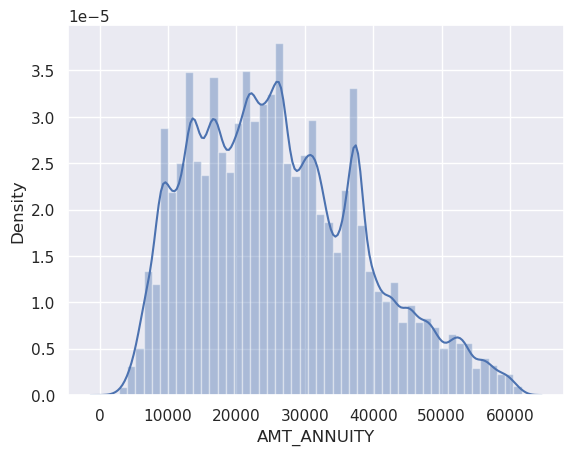

In [114]:
sns.distplot(data['AMT_ANNUITY'])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Feature Engineering

There are two indicators which are critical in mortgage approval process.

* LTV, loan to value, ratio = Loan / Value of collateral. Which is 'AMT_CREDIT'/ 'AMT_GOODS_PRICE'.
* DTI, Debt to income, ratio = amount of all the monthly debt payments / the gross monthly income. Which is 'AMT_ANNUITY' / 'AMT_INCOME_TOTAL'

In [116]:
data['LTV'] = data['AMT_CREDIT']/data['AMT_GOODS_PRICE']
data['DTI'] = data['AMT_ANNUITY']/data['AMT_INCOME_TOTAL']

# Data are prepared for modeling
* The data isn't have NaNs and I can say that RandomFroest model will be a good fit for this data as it 90% of it is boolean or categorical, so no need for any parametric models like Logistic Regression
* Also the data isn't have lineary correlated with the target variable.
* I didn't make any transformation to numeric variables as I'll use RandomForest (Which is will not got affected by the distribution of the variables)
    


In [117]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y           0.0          202500.0    406597.5   
1                    N           0.0          270000.0   1293502.5   
2                    Y           0.0           67500.0    135000.0   
3                    Y           0.0          135000.0    312682.5   
4                    Y           0.0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N           0.0          157500.0    254700.0   
307507               Y           0.0           72000.0    269550.0   
307508               Y           0.0          153000.0    677664.0   
307509               Y           0.0          171000.0    370107.0   
307510               N           0.0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801     -9461.0   
1       House / apartment                    0.003541    -16765.0   
2       House / apartment                    0.010032    -19046.0   
3       House / apartment                    0.008019    -19005.0   
4       House / apartment                    0.028663    -19932.0   
...                   ...                         ...         ...   
307506       With parents                    0.032561     -9327.0   
307507  House / apartment       

In [118]:
to_keep=[
    'SK_ID_CURR',
    'TARGET',
    'OCCUPATION_TYPE',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'Credit/Income',
    'Annuity/Income',
    'LTV',
    'DTI']

In [119]:
data = data[to_keep]

In [120]:
data

SK_ID_CURR  TARGET OCCUPATION_TYPE NAME_CONTRACT_TYPE CODE_GENDER  \
0           100002       1        Laborers         Cash loans           M   
1           100003       0      Core staff         Cash loans           F   
2           100004       0        Laborers    Revolving loans           M   
3           100006       0        Laborers         Cash loans           F   
4           100007       0      Core staff         Cash loans           M   
...            ...     ...             ...                ...         ...   
307506      456251       0     Sales staff         Cash loans           M   
307507      456252       0        Laborers         Cash loans           F   
307508      456253       0        Managers         Cash loans           F   
307509      456254       1        Laborers         Cash loans           F   
307510      456255       0        Laborers         Cash loans           F   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        DAYS_BIRTH  DAYS_EMPLOYED  Credit/Income  Annuity/Income       LTV  \
0          -9461.0         -637.0       2.007889        0.121978  1.158397   
1         -16765.0        -1188.0       4.790750        0.132217  1.145199   
2         -19046.0         -225.0       2.000000        0.100000  1.000000   
3         -19005.0        -3039.0       2.316167        0.219900  1.052803   
4         -19932.0        -3038.0       4.222222        0.179963  1.000000   
...            ...            ...            ...             ...       ...   
307506     -9327.0         -236.0       1.617143        0.174971  1.132000   
307507    -20775.0        -8752.0       3.743750        0.166687  1.198000   
307508    -14966.0        -7921.0       4.429176        0.195941  1.158400   
307509    -11961.0        -4786.0       2.164368        0.118158  1.158394   
307510    -16856.0        -1262.0       4.285714        0.311857  1.000000   

             DTI  
0       0.121978  
1       0.132217  
2       0.100000  
3       0.219900  
4       0.179963  
...          ...  
307506  0.174971  
307507  0.166687  
307508  0.195941  
307509  0.118158  
307510  0.311857  

[307511 rows x 15 columns]

# Export du dataframe

In [ ]:
1/0

In [121]:
# Export du dataframe

data.to_csv("./data.csv", index=False)

